In [474]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# STAGE 1

In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [476]:
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep=";")
#df = pd.read_csv('marketing_campaign.csv', sep=";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# EDA

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [478]:
df['Dt_Customer'] = df['Dt_Customer'].astype('datetime64[ns]')
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [479]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [480]:
df['Income'] = df['Income'].fillna((df['Income'].median()))
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [481]:
#total campaign accepted
df['AcceptedCmptot'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] +df['AcceptedCmp5']

#Age : this year (example 2014) - Year birth
df['Age'] = 2014 - df['Year_Birth'] 

#customer month
df['Customer_Months'] = (pd.to_datetime("2014-12-31") - pd.to_datetime(df['Dt_Customer'])) // np.timedelta64(1,'M')  

display(df.head(3))
print('')
display(df.tail(3))

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  AcceptedCmptot  Age  Customer_Months  
0              3         11         1               0   57               27  
1              3         11         0               0   60                9  
2              3         11         0               0   49               16

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
2237  7270        1981  Graduation       Divorced  56981.0        0         0   
2238  8235        1956      Master       Together  69245.0        0         1   
2239  9405        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
2237  2014-01-25       91       908         48              217   
2238  2014-01-24        8       428         30              214   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
2237                  6             0             1             0   
2238                  3             0             0             0   
2239                  7             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
2237             0             0         0              3         11   
2238             0             0         0              3         11   
2239             0             0         0              3         11   

      Response  AcceptedCmptot  Age  Customer_Months  
2237         0               1   33               11  
2238         0               0   58               11  
2239         1               0   60               26

In [482]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'AcceptedCmptot', 'Age', 'Customer_Months'],
      dtype='object')

In [483]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [484]:
# kategori YOLO, Alone, Absurd pada marital_status dimasukkan ke dalam kategori Single karena memiliki pengertian yang sama
df = df.replace({'Marital_Status' : {'YOLO' : 'Single', 'Alone' : 'Single', 'Absurd' : 'Single'}})
print(df['Marital_Status'].value_counts())

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64


In [485]:
df = df.replace({'Education' : {'Basic' : 'Elementary Sch', '2n Cycle' : 'Middle-High Sch'}})
print(df['Education'].value_counts())

Graduation         1127
PhD                 486
Master              370
Middle-High Sch     203
Elementary Sch       54
Name: Education, dtype: int64


## Descriptive Statistics

In [486]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2240.0  52237.975446  25037.955891  1730.0  35538.75   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   
AcceptedCmptot       2240.0      0.297768      0.678381     0.0      0.00   
Age                  2240.0     45.194196     11.984069    18.0     37.00   
Customer_Months      2240.0     17.194643      6.622911     6.0     11.75   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68289.75  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0  
AcceptedCmptot           0.0      0.00       4.0  
Age                     44.0     55.00     121.0  
Customer_Months         17.0     23.00      29.0

- Tidak terdapat nilai duplikat pada data
- Semua tipe data sudah sesuai kecuali pada variabel Dt_Customer sehingga diconvert menjadi date type kemudian dibuat variabel baru untuk mendapatkan lama customer join ke company
- Variabel income memiliki mean dan median yang hampir sama, namun nilai max yang sangat tinggi menunjukkan adanya indikasi outlier
- Tidak ada nilai statistika yang aneh pada variabel kidhome, teenhome, dan recency
- Pada variabel amount spent on products terlihat bahwa SEMUA PRODUK memiliki mean yang lebih besar dari median yang menandakan pola distribusi positively skewed
- Sementara itu, tidak terjadi keanehan nilai statistik pada number of purchase
- Meskipun variabel age tidak menunjukkan statistik yang aneh, namun terlihat bahwa usia customer tertua yaitu 121 tahun dimana nilai ini sangat jauh dari rata-rata
- Variabel customer_months memiliki pola distribusi yang simetris, dapat dilihat dari nilai mean median yang hampir sama
- Kolom Z_CostContact dan Z_Revenue tidak dimasukkan dalam pemodelan karena mengandung nilai yang sama
- Terdapat missing value pada variabel income sebanyak 1.07 %, dilakukan imputasi menggunakan median

## Univariate Analysis

In [487]:
demographic = ['Income', 'Age', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot' ]
spent = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

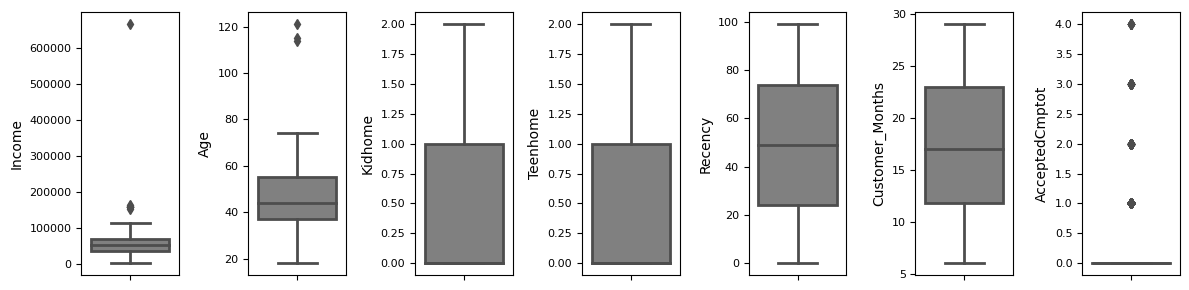

In [488]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic)):
    plt.subplot(1, len(demographic), i+1)
    sns.boxplot(y=df[demographic[i]], color='grey', orient='v')
    plt.tight_layout()

- Variabel Income memiliki outlier yang sangat tinggi sehingga dilakukan penanganan menggunakan nilai batas atas
- Outlier pada variabel age tidak diatasi
- Recency dan customer month terlihat memiliki pola distribusi yang simetris

In [489]:
df['Income_new'] = df['Income']

In [490]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [491]:
low, high = outlier(df['Income_new'])

In [492]:
#replacing outlier with upper bound and lower bound value
df['Income_new'] = np.where(df['Income_new']>high, high, df['Income_new'])
df['Income_new'] = np.where(df['Income_new']<low, low, df['Income_new'])

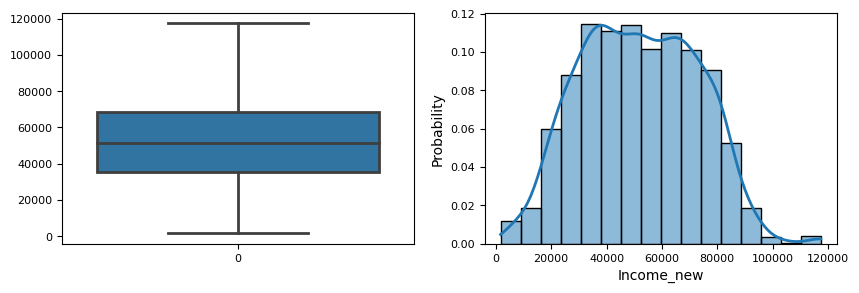

In [493]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.boxplot(ax=axes[0], data = df['Income_new'])
sns.histplot(ax=axes[1], data = df, x = "Income_new", kde = True, stat = "probability", bins=int(80/5))
plt.show()

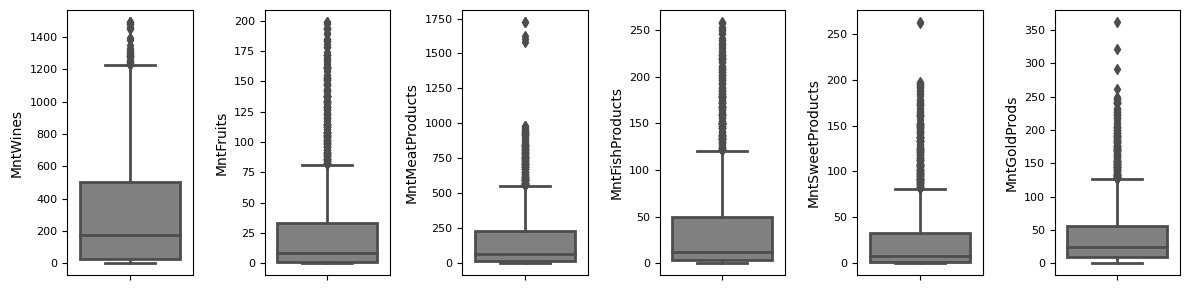

In [494]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(spent)):
    plt.subplot(1, len(spent), i+1)
    sns.boxplot(y=df[spent[i]], color='grey', orient='v')
    plt.tight_layout()

Dari penggambaran boxplot diketahui bahwa amount purchases untuk produk Wine memiliki nilai tertinggi, dimana sebaran data dari 0 - 500 sampai memiliki customer outlier dengan pembelian mencapai 1200 - 1400 dollar.

Dari visual boxplot juga diketahui bahwa persebaran setiap produk memiliki pola right skewness dimana nilai mean lebih besar dari median dengan frekuensi terbesar untuk pembelian Wine berada pada range 180. Berdasarkan boxplot diatas customer sangat menyukai produk wine dari store ini sehingga menjadi peluang untuk campaign selanjutnya mempromosikan Wine. 

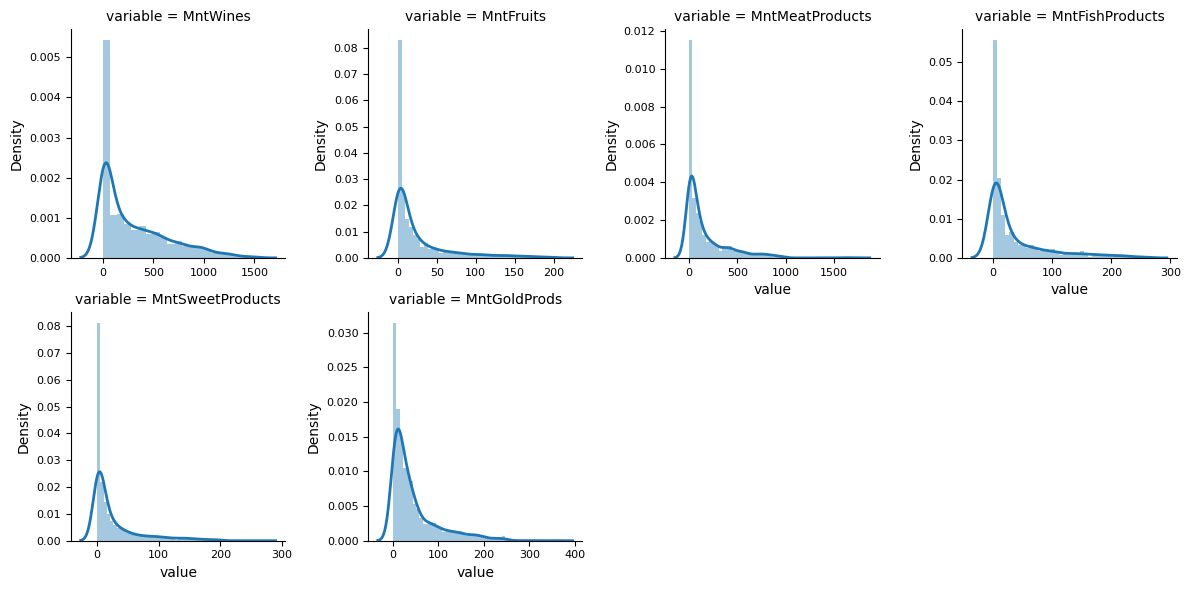

In [495]:
#Analisis Untuk Amount Spent dari customer untuk setiap produk 
df1 = pd.DataFrame(data=df, columns=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
nd = pd.melt(df1, value_vars =df1 )
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
plt.show()

Dari persebaran grafik diatas dapat dilihat bahwa customer sangat tertarik untuk berbelanja produk Wine.

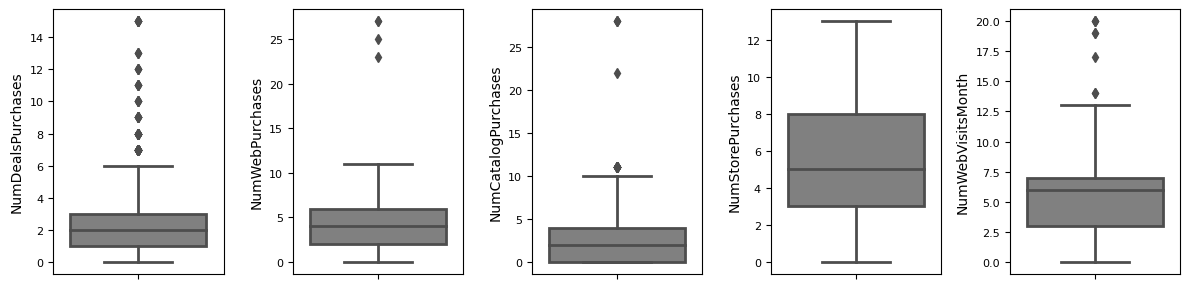

In [496]:
for i in range(0, len(purchase)):
    plt.subplot(1, len(purchase), i+1)
    sns.boxplot(y=df[purchase[i]], color='grey', orient='v')
    plt.tight_layout()

Dari boxplot diatas dapat ditunjukkan bahwa customer sering berbelanja apabila ada diskon dimana persebaran data NumDealsPurchases atau pembelian langsung berada pada range 1-3 dengan banyak outlier diatas 6 kali pembelian.

Selain itu customer untuk store ini juga sering berbelanja langusng dimana NumStorePurchases memiliki persebaran dengan left skewed dengan nilai rage antara 3 - 8 dengan tidak ada outlier.

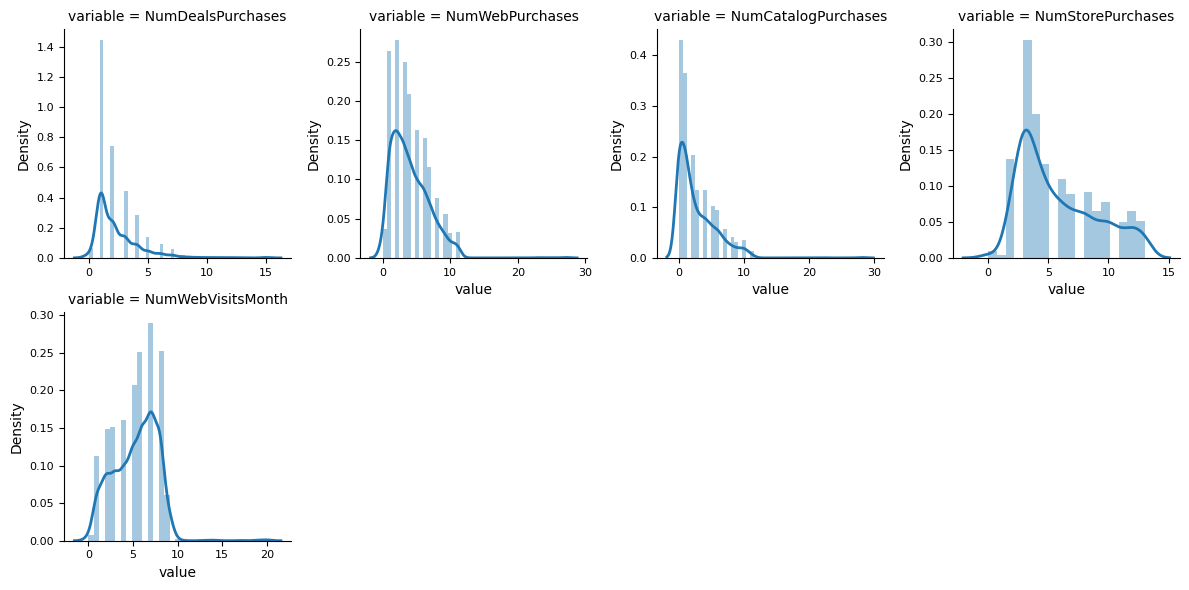

In [497]:
#Analisis NumPurchases atau pembelian setiap customer yang telah berbelanja.
df2 = pd.DataFrame(data=df, columns=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'])
nd = pd.melt(df2, value_vars =df2 )
n2 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n2 = n2.map(sns.distplot, 'value')
n2
plt.show()

Berdasarkan persebaran grafik diatas customer lebih memilih untuk berbelanja langsung ke lokasi store langsung.

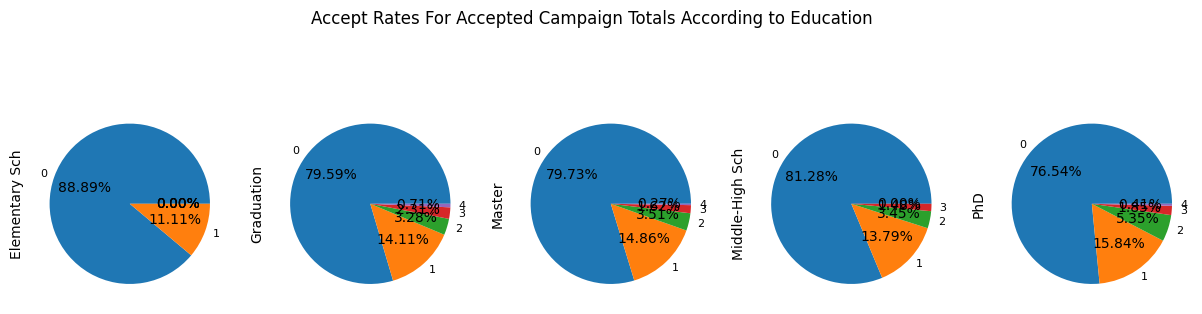

In [498]:
campaigns = ["AcceptedCmptot"]
for i in campaigns:
    pd.crosstab(index= df[i] , columns=df['Education']).plot(kind="pie", figsize=(15, 4), subplots=True, autopct='%1.2f%%',
                                                                 legend=False, title=f"Accept Rates For Accepted Campaign Totals According to Education")
    plt.show()

Dari pie chart diatas, dapat ditunjukkan bahwa semakin tinggi tingkat pendidikan, kemungkinan untuk customer accept campaign juga semakin besar.

## Multivariate Analysis

### Hubungan variabel dengan target

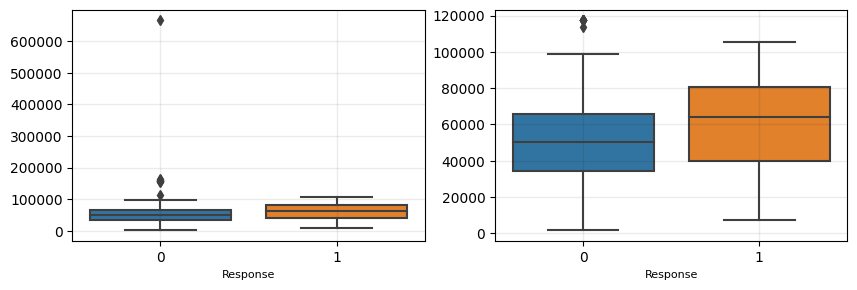

In [499]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.style.use('default')
sns.boxplot(ax=axes[0], y='Income', x='Response', data=df)
sns.boxplot(ax=axes[1], y='Income_new', x='Response', data=df)

for ax in axes:
    ax.grid(c = 'black', lw = 1, axis = 'both', alpha = 0.08)
    ax.set_ylabel(None)
    ax.set_xlabel('Response', fontsize=8)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 10)

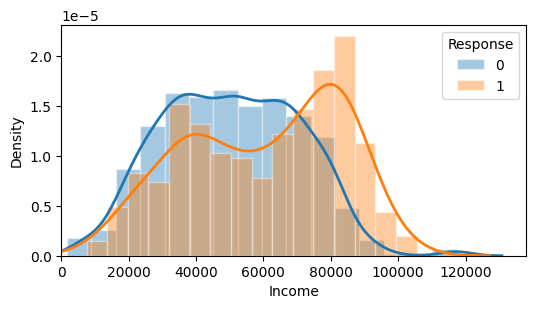

In [500]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Income_new'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Income')
plt.ylabel('Density')
plt.show()

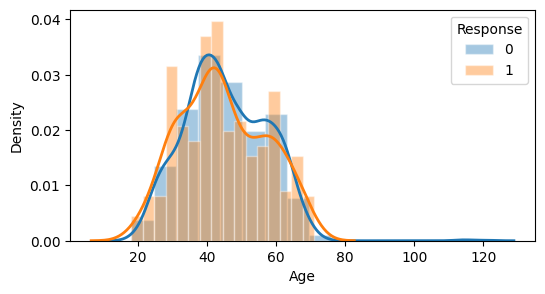

In [501]:
f,ax = plt.subplots(figsize=(6,3))

response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Age'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

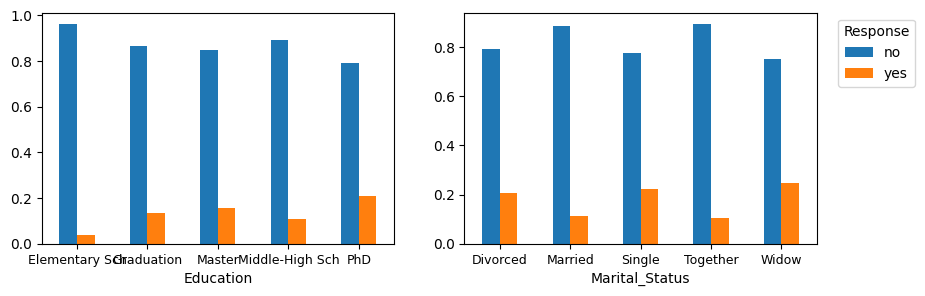

In [502]:
byEducation = df.groupby('Education').Response.value_counts(normalize=True)
byMarital = df.groupby('Marital_Status').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byEducation.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byMarital.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["no", "yes"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

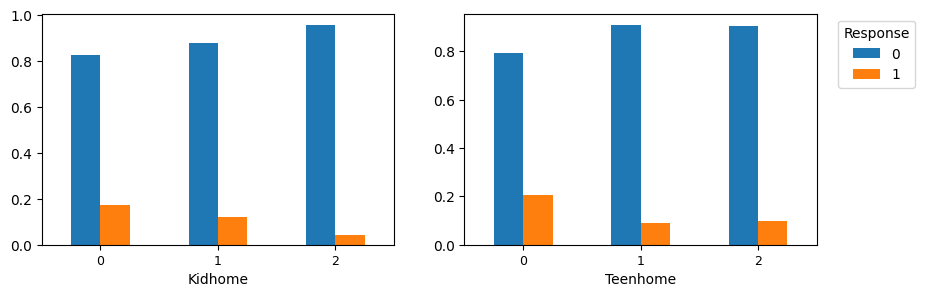

In [503]:
bykidhome = df.groupby('Kidhome').Response.value_counts(normalize=True)
byteenhome = df.groupby('Teenhome').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = bykidhome.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byteenhome.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

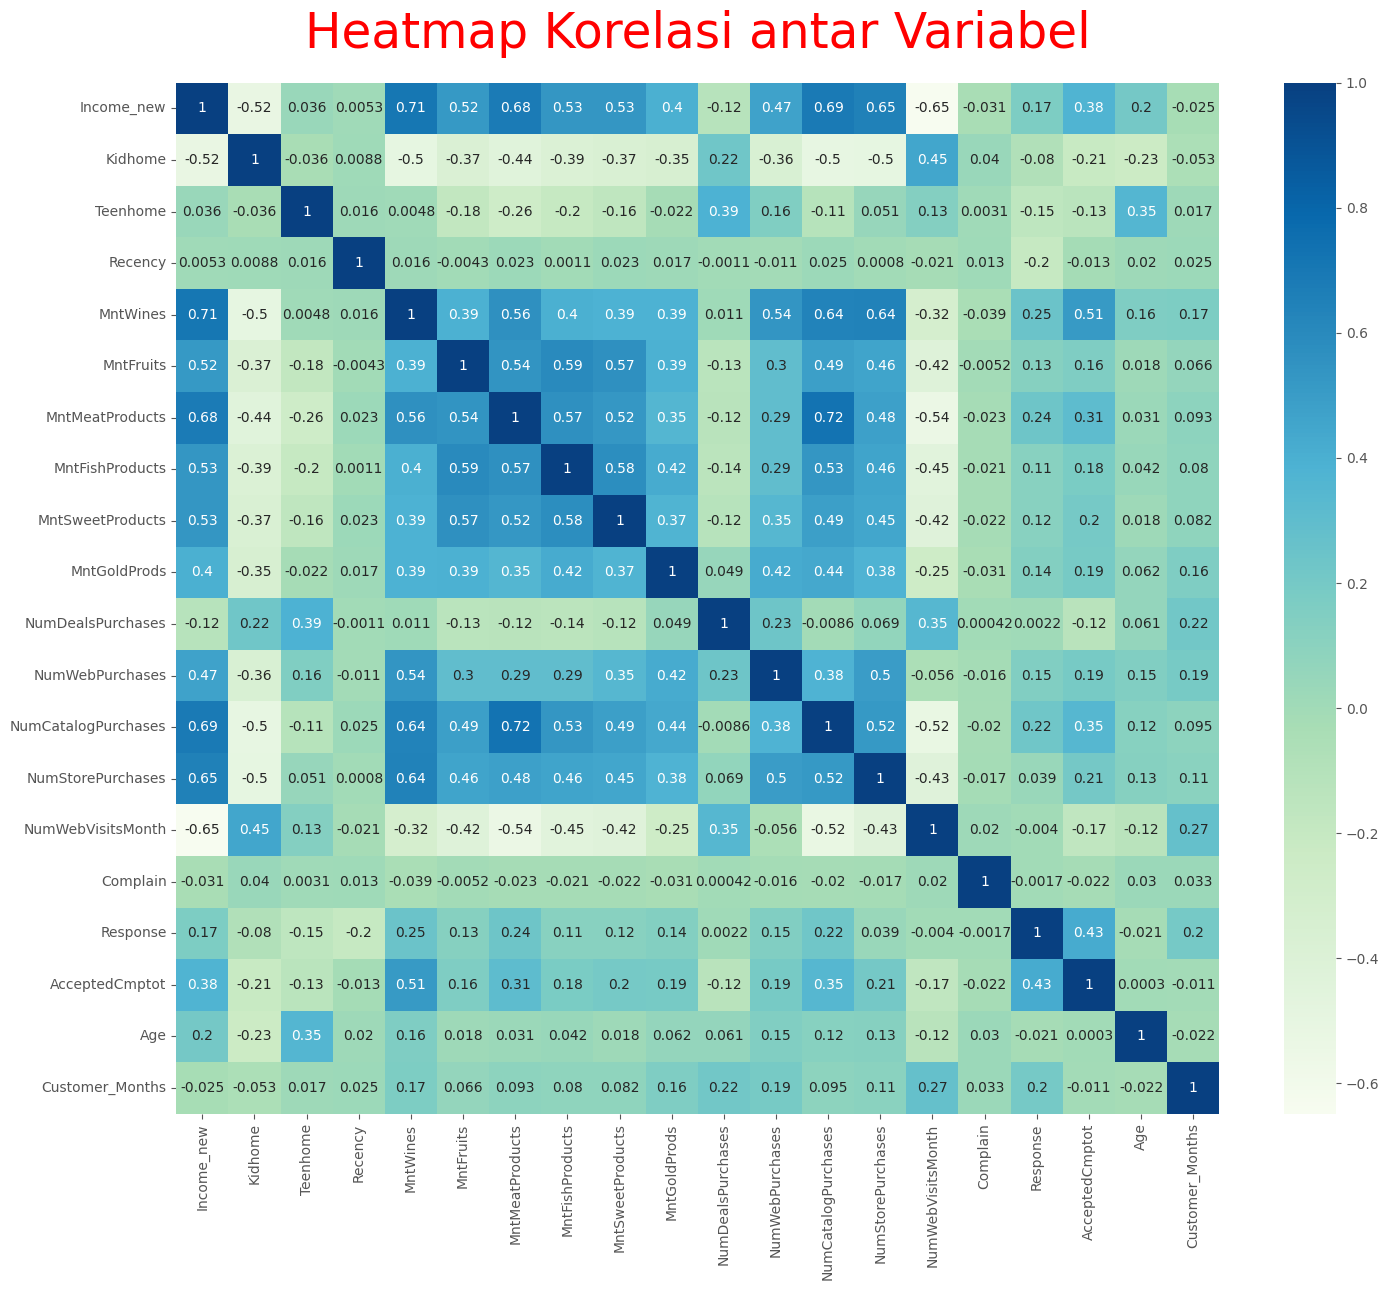

In [504]:
#heatmap korelasi masing-masing variabelnya
plt.figure(figsize=(15,13))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df[['Income_new', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 
                   'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                   'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Response', 'AcceptedCmptot',
                   'Age', 'Customer_Months']].corr(), annot=True, cmap ='GnBu')
plt.title('Heatmap Korelasi antar Variabel', fontsize = 35, pad = 25, color = 'r')
plt.tight_layout()
plt.show()

*   Korelasi antara jumlah anak kecil dalam rumah tangga cukup besar, namun berbanding terbalik dengan jumlah pendapatan. Maka, **semakin tinggi pendapatan, semakin kecil sedikit juga jumlah anak kecil yang dimiliki**.
*   Variabel lain yang memiliki korelasi yang cukup tinggi dengan pendapatan ialah jumlah konsumsi semua produk, serta jumlah pembelian melalui web, catalog, dan toko.
*   Dapat diketahui pula jika variabel umur memiliki korelasi positif dengan pendapatan, namun tidak signifikan. Sehingga dapat disimpulkan, bahwa** semakin tinggi pendapatan kustomer 'umumnya' semakin tua juga umurnya.**
*   Pembelian melalui toko dengan katalog memiliki korelasi yang cukup besar dan berbanding lurus dengan pembelian produk. Berbeda dengan pembelian melalui website yang berbanding terbalik, sehingga **umumnya kustomer membeli produk melalui toko dan katalog.**
*   Jumlah pembelian wine dengan jumlah iklan yang diterima (accepted campaign) cukup besar dan berbanding lurus, dari hal tersebut dapat diketahui bahwa **umumnya kustomer membeli wine karena tergiur oleh iklan.** hmm... 🤔









<b> rfm metrics </b>

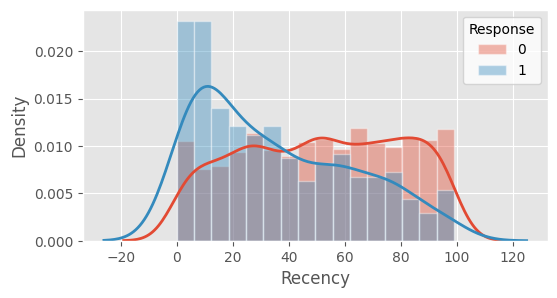

In [505]:
f,ax = plt.subplots(figsize=(6,3))
plt.style.use('default')
response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Recency'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
#plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Recency')
plt.ylabel('Density')
plt.show()

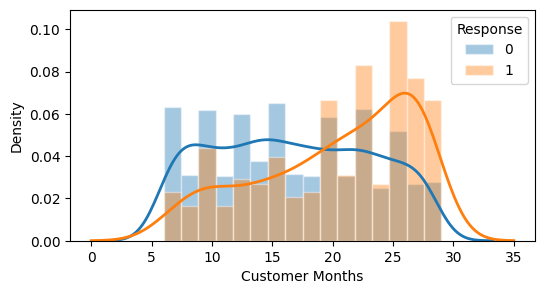

In [506]:
f,ax = plt.subplots(figsize=(6,3))
plt.style.use('default')
response_cat = [0,1]

for i in response_cat:
    subset = df[df['Response'] == i]
    sns.distplot(subset['Customer_Months'], hist = True, kde = True, bins=int(80/5), kde_kws = {'linewidth':2}, 
                 hist_kws = {'edgecolor':'#ffffff','linewidth':1, 'linestyle':'-', 'alpha':0.4}, label = i)
    
#plt.xlim(0,)
plt.legend(prop={'size': 10}, title = 'Response')
plt.xlabel('Customer Months')
plt.ylabel('Density')
plt.show()

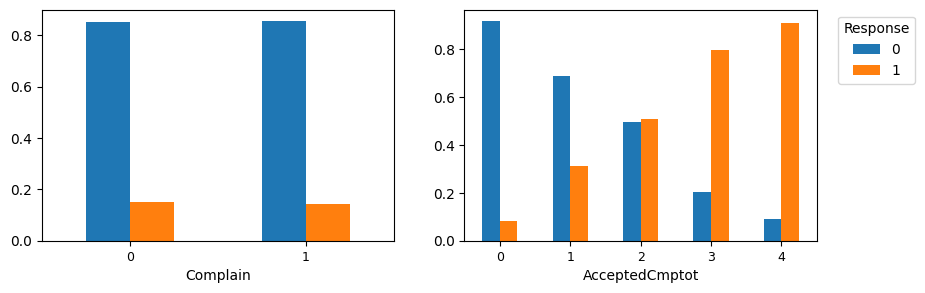

In [507]:
bycomplain = df.groupby('Complain').Response.value_counts(normalize=True)
bycampaign = df.groupby('AcceptedCmptot').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
plt.style.use('default')
g1 = bycomplain.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = bycampaign.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

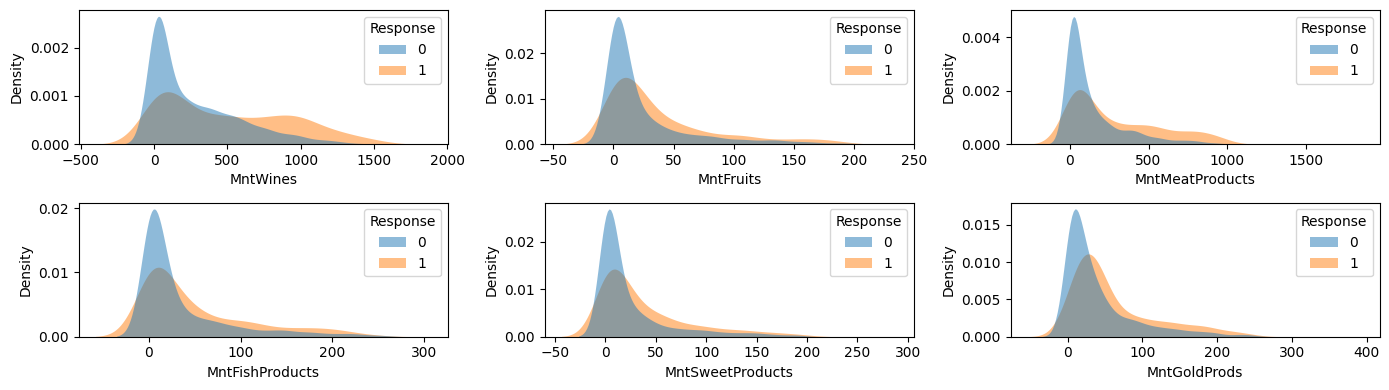

In [508]:
fig = plt.figure(figsize=(14, 4))
plt.style.use('default')
for i in range(0, len(spent)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.kdeplot(ax=ax, data=df, x=spent[i], hue='Response', fill=True, common_norm=False, alpha=.5, linewidth=0)
    #plt.xticks(fontsize=10)
    plt.tight_layout()

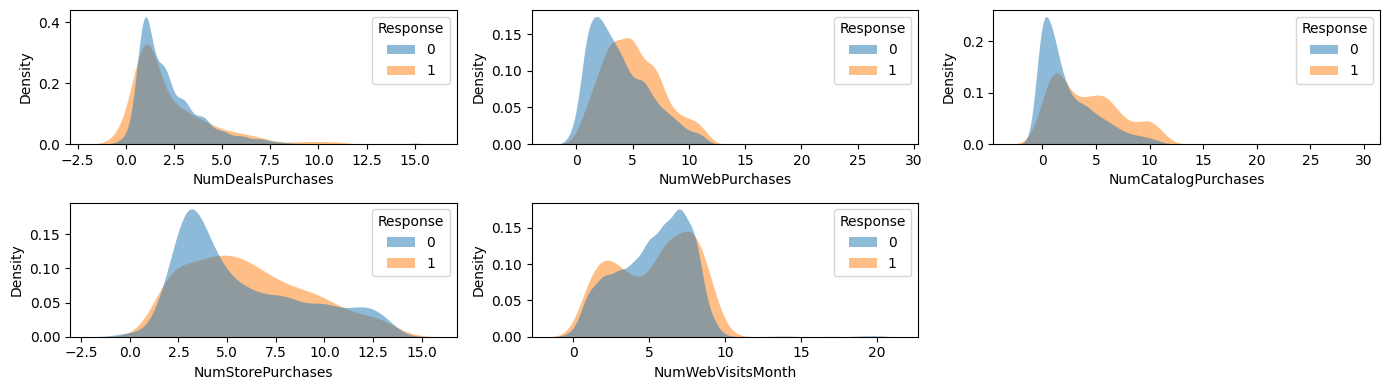

In [509]:
fig = plt.figure(figsize=(14, 4))
plt.style.use('default')
for i in range(0, len(purchase)):
    ax = fig.add_subplot(2, 3, i+1)
    sns.kdeplot(ax=ax, data=df, x=purchase[i], hue='Response', fill=True, common_norm=False, alpha=.5, linewidth=0)
    #plt.xticks(fontsize=10)
    plt.tight_layout()

### Hubungan antar variabel

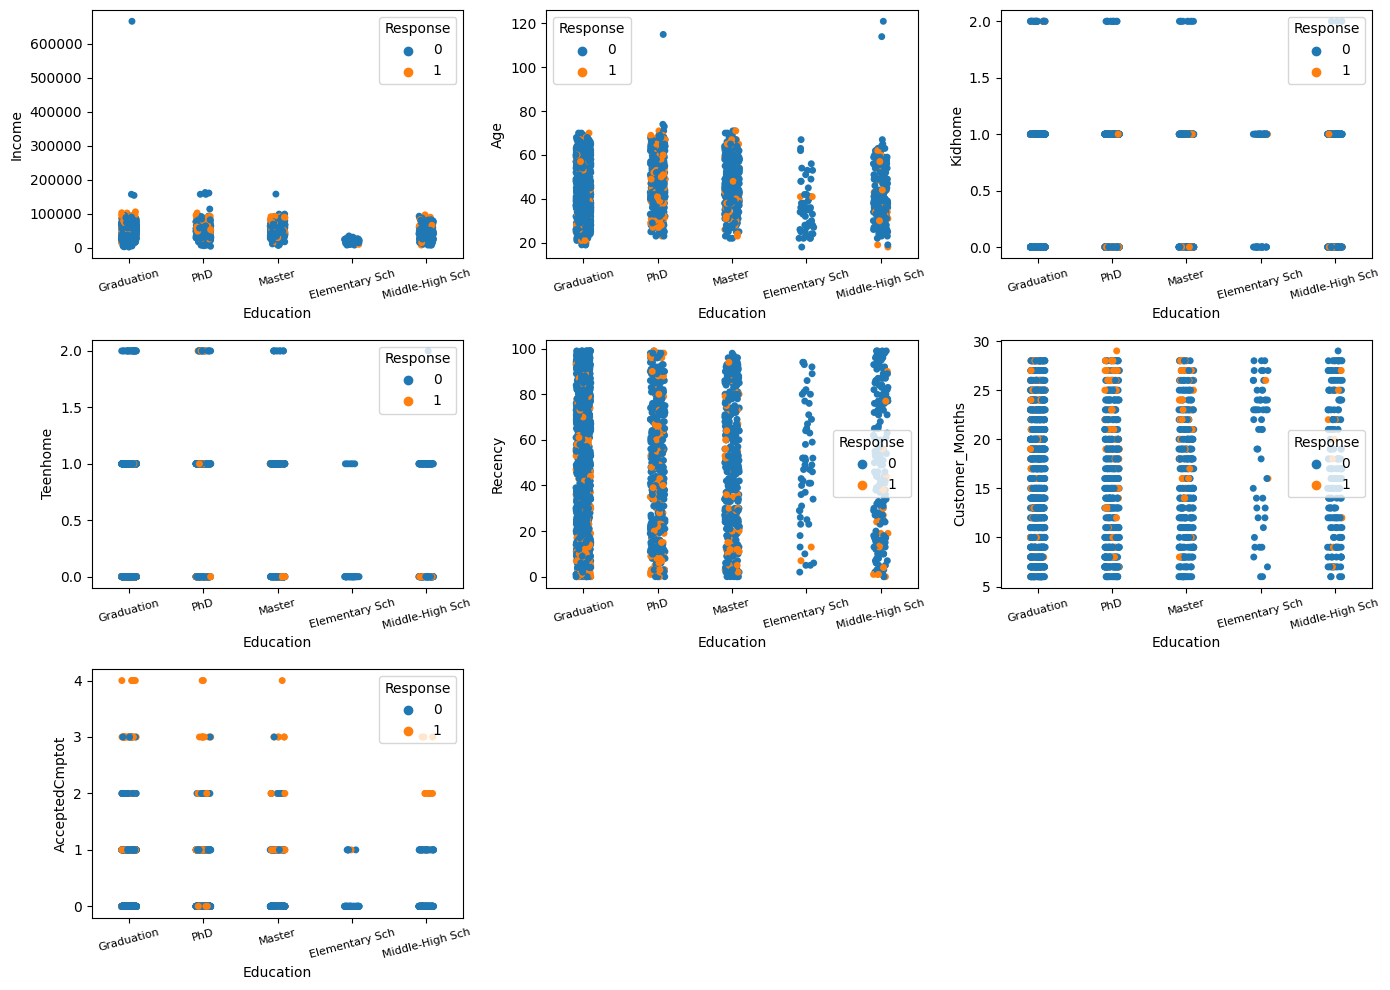

In [512]:
fig = plt.figure(figsize=(14, 10))
plt.style.use('default')
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

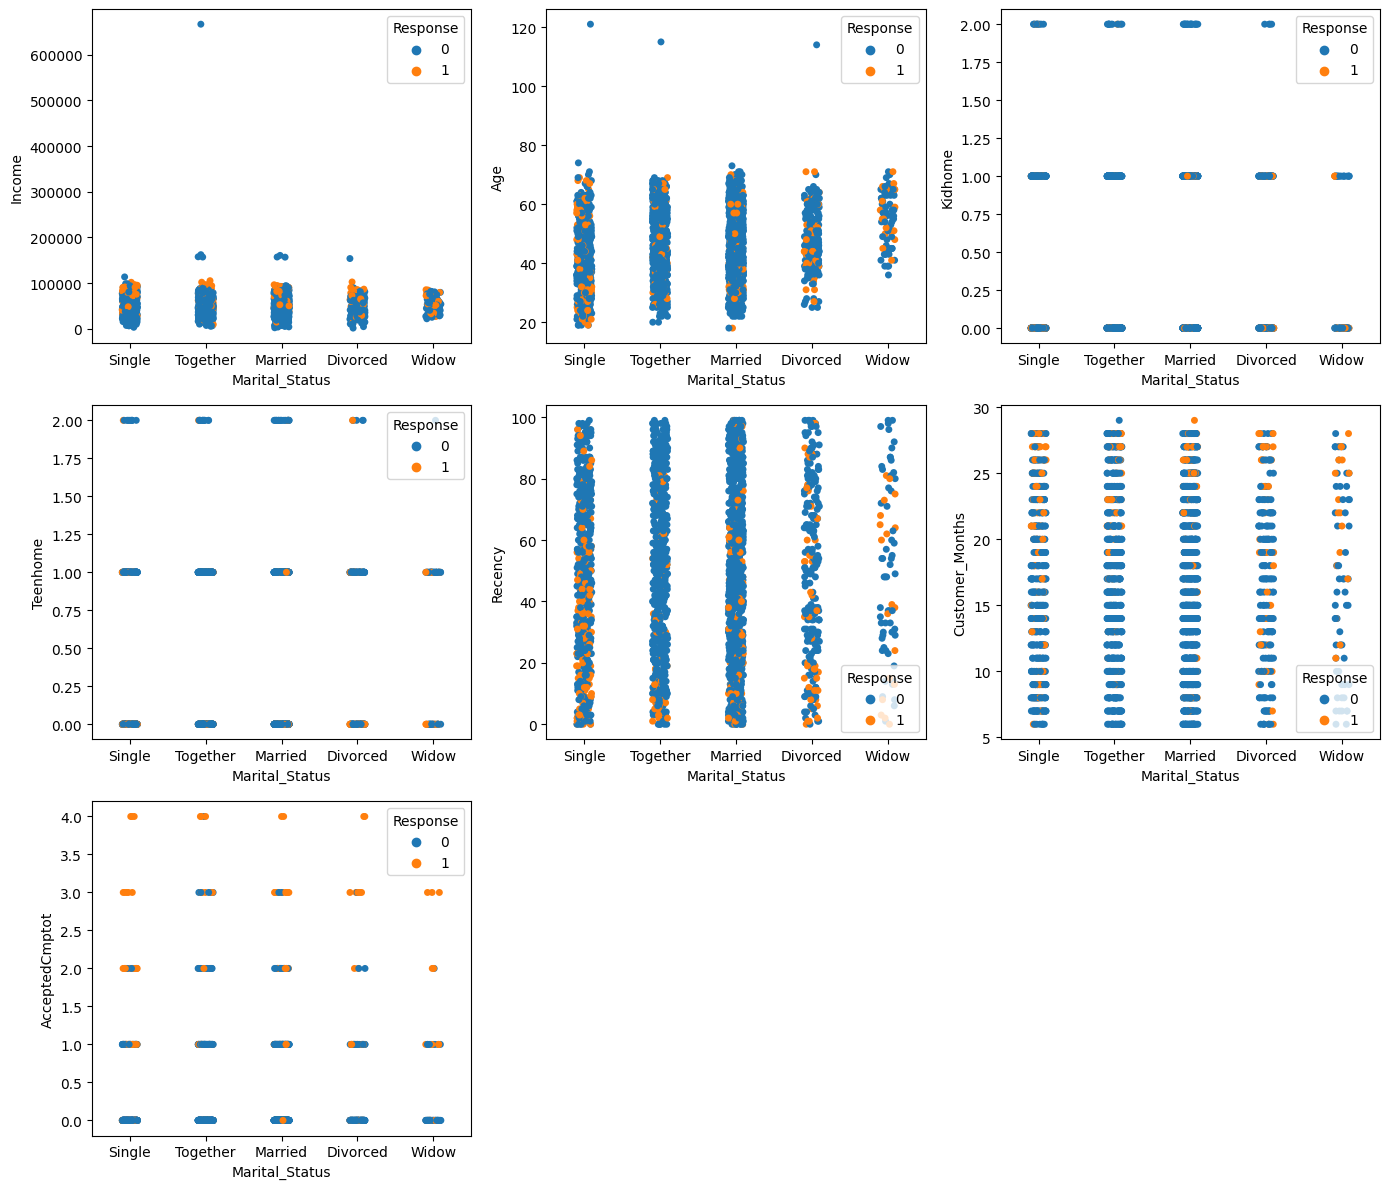

In [416]:
fig = plt.figure(figsize=(14, 12))
plt.style.use('default')
for i in range(0, len(demographic)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=demographic[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(fontsize=10)
    plt.tight_layout()

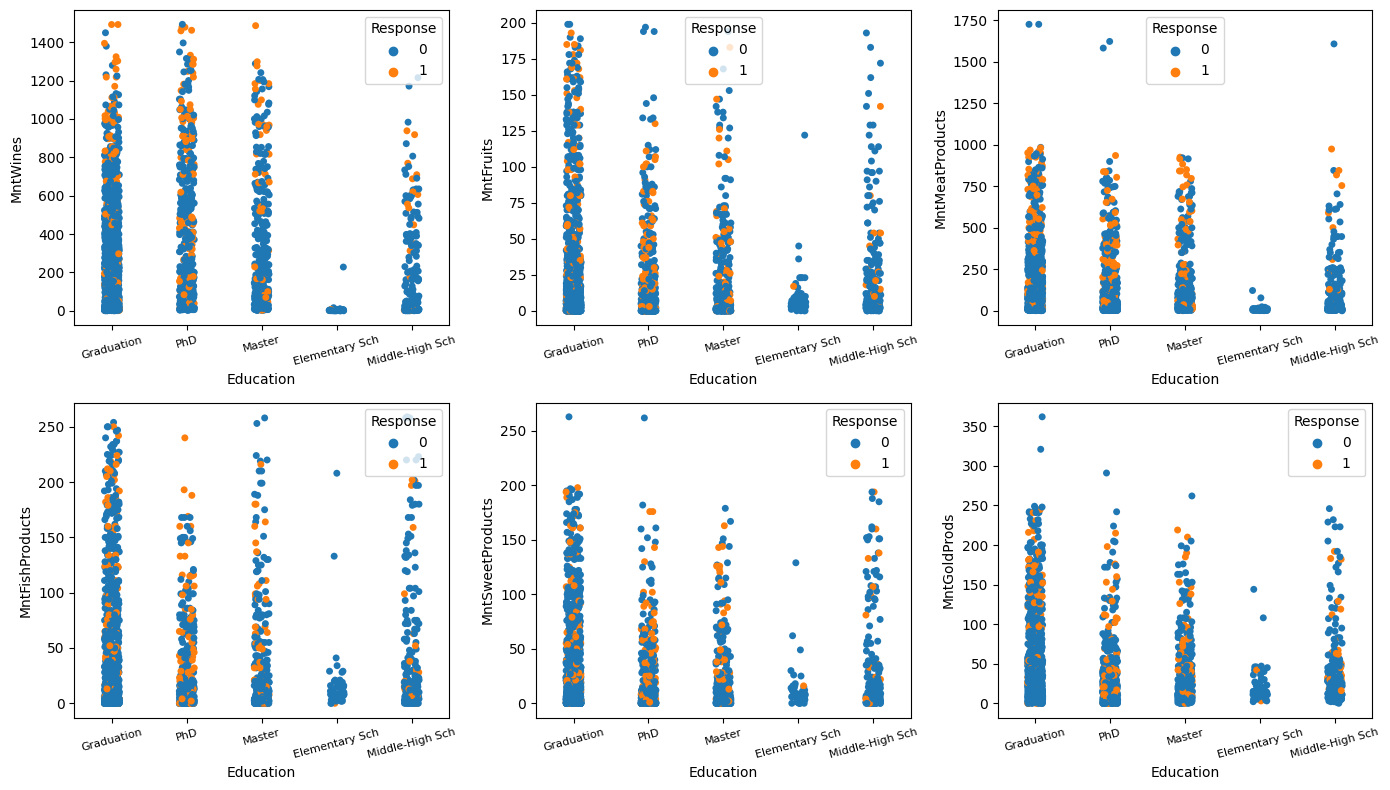

In [513]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

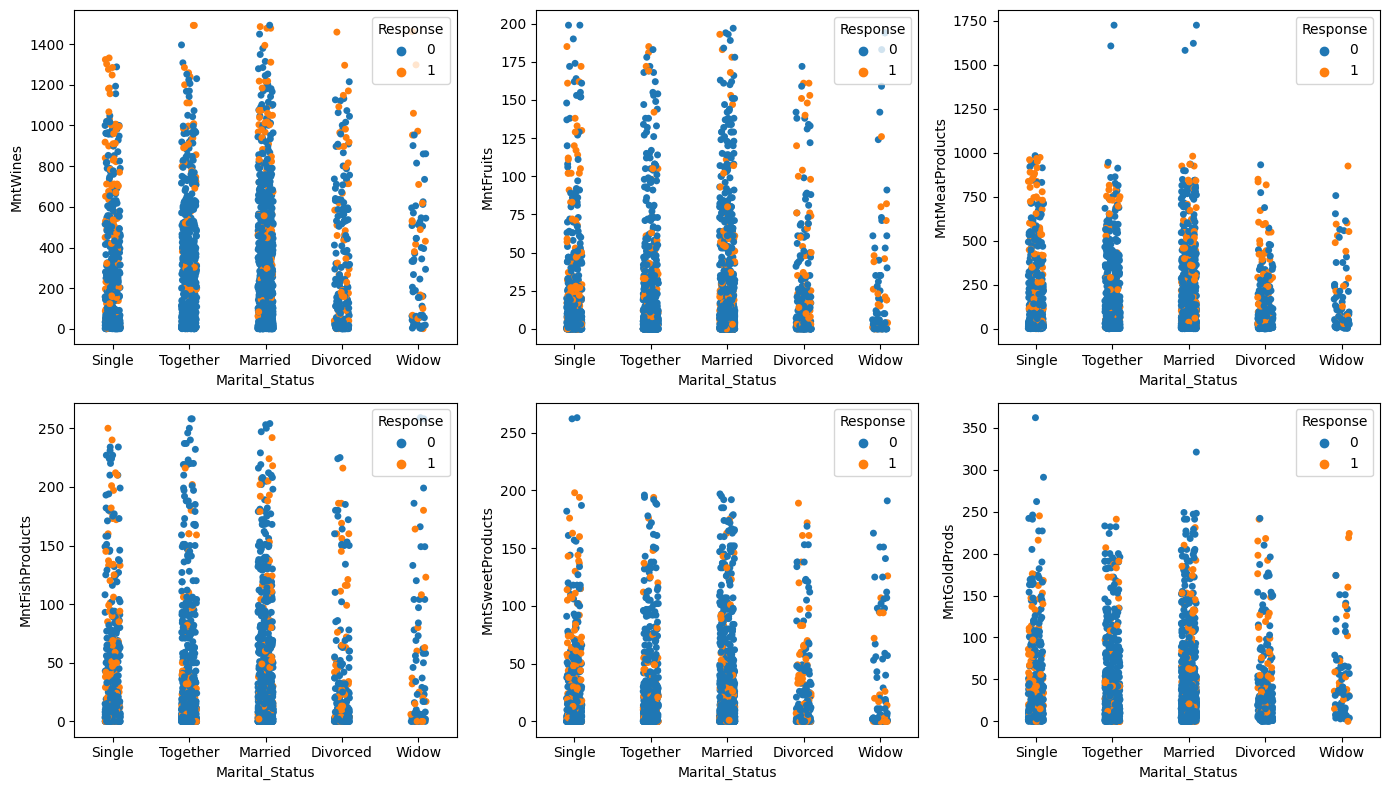

In [418]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(spent)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=spent[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()


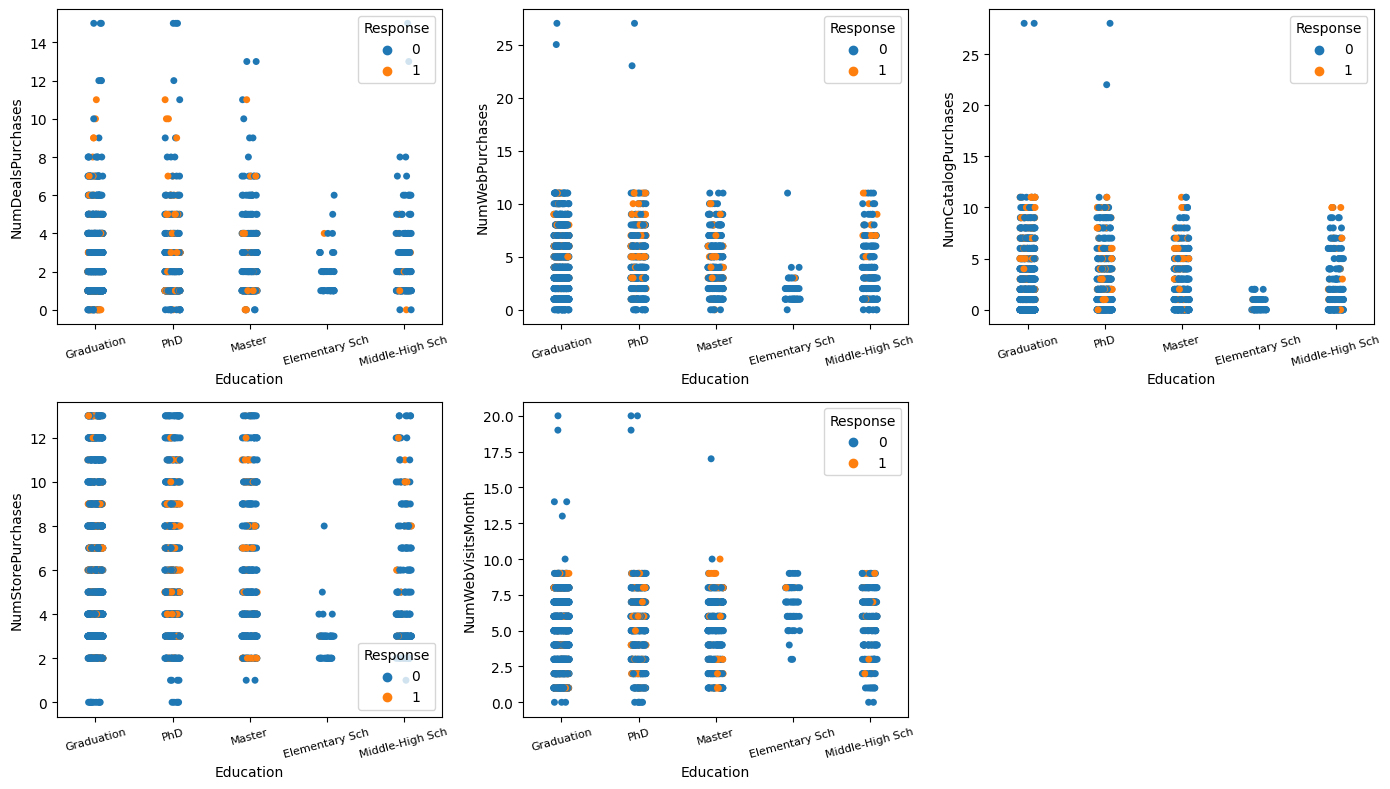

In [514]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Education', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.xticks(rotation=15, fontsize=8)
    plt.tight_layout()

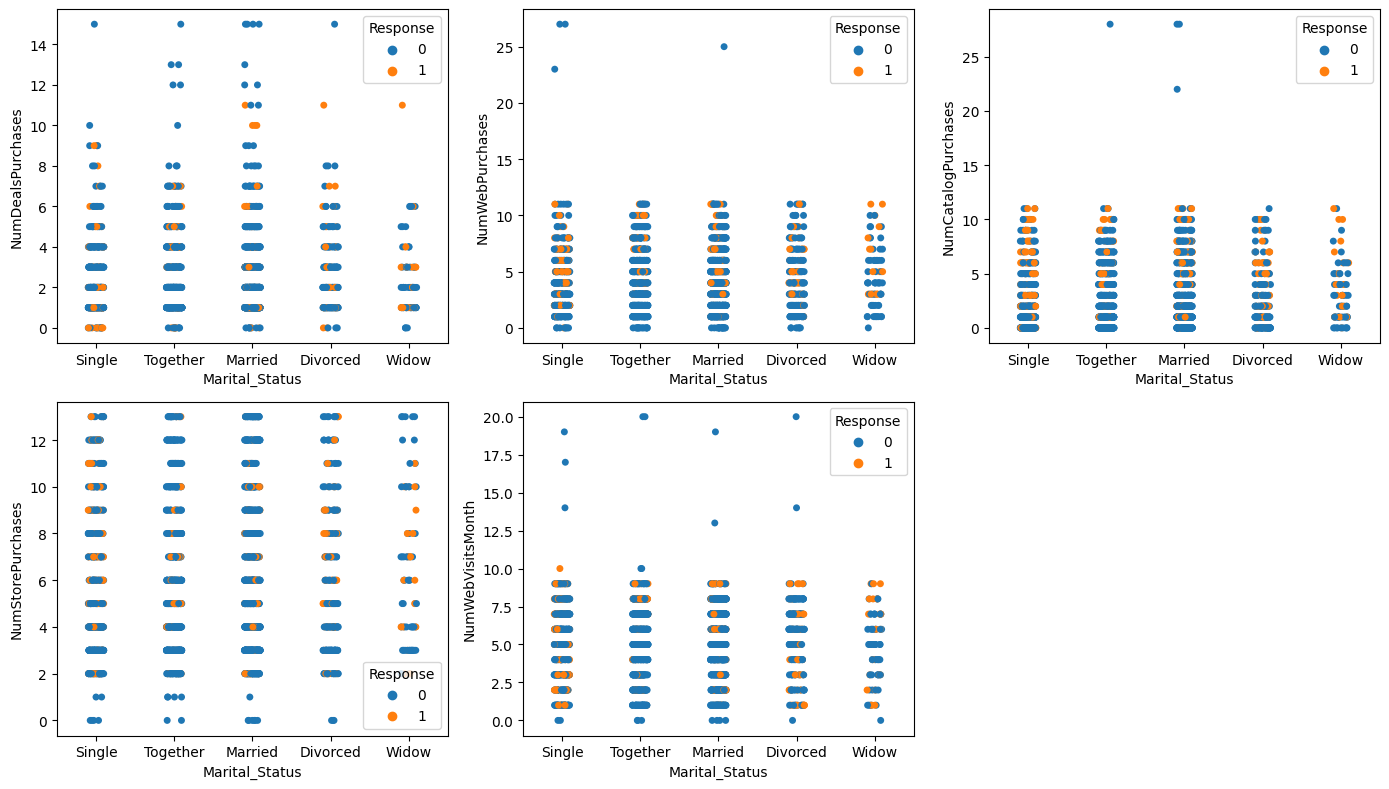

In [420]:
fig = plt.figure(figsize=(14, 8))
plt.style.use('default')
for i in range(0, len(purchase)): # untuk setiap kolom numerik
    ax = fig.add_subplot(2, 3, i+1) # kita set posisi catplot/stripplotnya di layout
    sns.stripplot(ax=ax, data=df, x='Marital_Status', y=purchase[i], hue='Response') # gambar catplot/stripplotnya
    plt.tight_layout()

## Business Insight

In [515]:
# bisnis insight : segmentasi target
# Pie Chart berdasarkan setiap kategori yang ditinjau dengan value masing-masing berdasarkan income customer
# Will be better if we can just make "Single, Divorced and Widowed as alone" and "Married and Together as In_Couple"
# Maybe we can segmentate age as Elder, Adult or Millenial
import plotly.express as px
fig = px.sunburst(df, path=['Response','Marital_Status', 'Education'], values='Income_new')
fig.show()

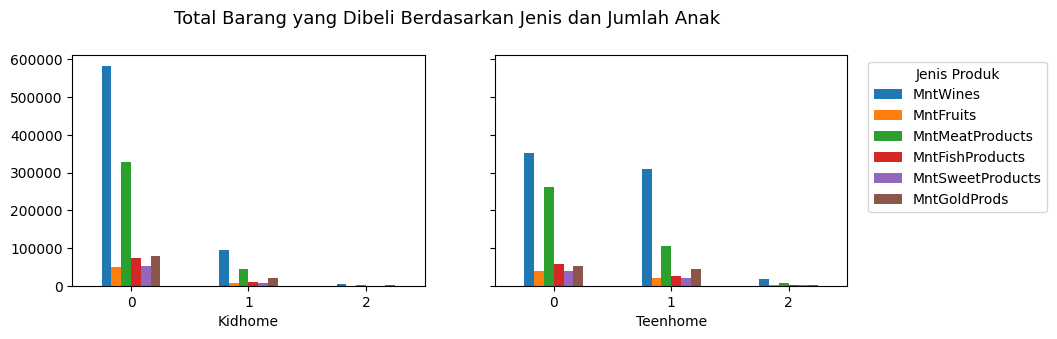

In [516]:
# Bussiness Insight : Hubungan Antara Jumlah Anak (Anak Kecil dan Remaja) dan Pengeluaran
kidhome = df.groupby('Kidhome')[spent].sum()
teenhome = df.groupby('Teenhome')[spent].sum()
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey = True)
g1 = kidhome.plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = teenhome.plot(ax = axes[1] ,kind ='bar')
fig.suptitle("Total Barang yang Dibeli Berdasarkan Jenis dan Jumlah Anak", fontsize=13, y=1.03)
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
plt.legend(title='Jenis Produk', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

Dapat dilihat bahwa jumlah anak cukup mempengaruhi pengeluaran secara signifikan, akan tetapi ini masih dari jumlah anak yang dibawah usia remaja, bagaimana dengan anak anak yang berusia remaja ?

Ternyata jumlah dari pengeluaran juga tetap menurun akan tetapi jika dilihat lagi selisih dari mereka yang tidak memiliki anak kecil dengan yang memiliki 1 anak kecil cukup drastis jika dibandingkan dengan mereka yang tidak memiliki anak remaja dan memiliki 1 anak remaja.

Hal ini kemudian dapat dibandingkan lagi antara total transaksi dan jenis transaksi yang terjadi melalui platform apa bagi mereka yang memiliki anak kecil dan anak remaja

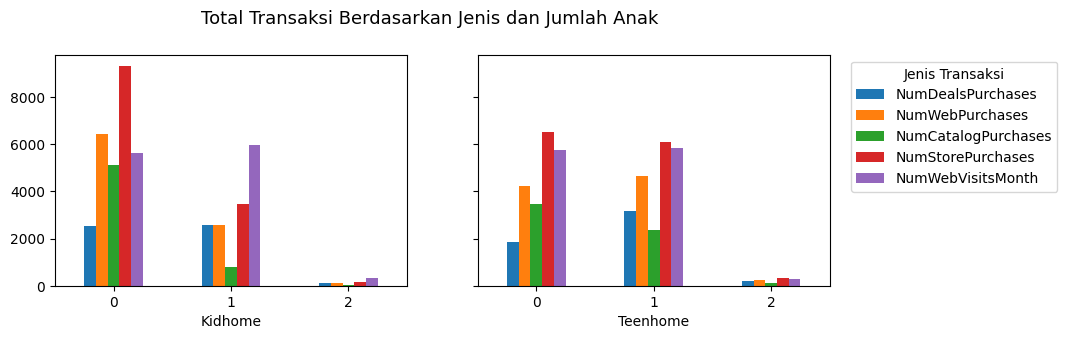

In [517]:
# Bussiness Insight : Hubungan Antara Jumlah Anak (Anak Kecil dan Remaja) dan Jenis Transaksi
kidhomes = df.groupby('Kidhome')[purchase].sum()
teenhomes = df.groupby('Teenhome')[purchase].sum()
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey = True)
g1 = kidhomes.plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = teenhomes.plot(ax = axes[1] ,kind ='bar')
fig.suptitle("Total Transaksi Berdasarkan Jenis dan Jumlah Anak", fontsize=13, y=1.03)
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0)
plt.legend(title='Jenis Transaksi', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

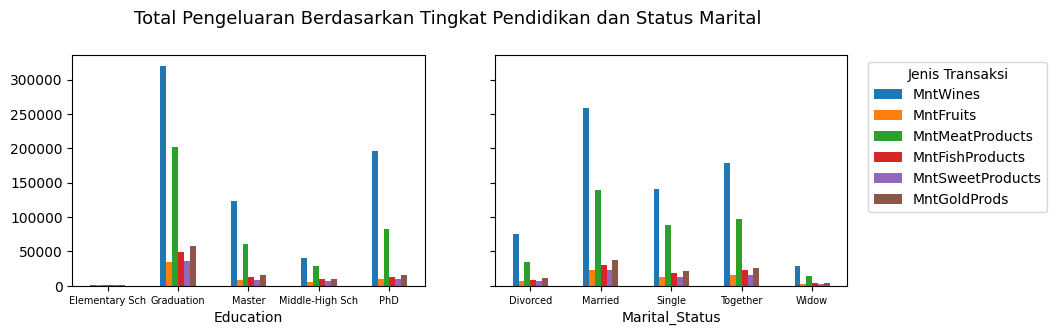

In [518]:
# Business insight untuk Total Pengeluaran Berdasarkan Tingkat Pendapatan Dan Jenis-Jenis Produk
# Business insight untuk melihat pengeluaran apa yang terbesar berdasarkan status customer
total_spending = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
total_spending2 = df.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
fig, axes = plt.subplots(1, 2, figsize=(10,3), sharey = True)
g1 = total_spending.plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = total_spending2.plot(ax = axes[1] ,kind ='bar')
fig.suptitle("Total Pengeluaran Berdasarkan Tingkat Pendidikan dan Status Marital", fontsize=13, y=1.03)
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=7)
plt.legend(title='Jenis Transaksi', bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

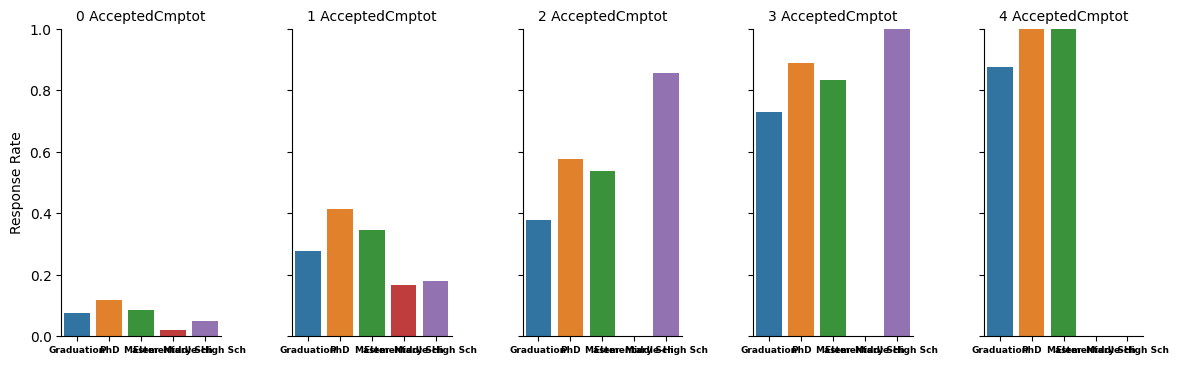

In [519]:
plt.style.use('default')
g = sns.catplot(data=df, x="Education", y="Response", col="AcceptedCmptot",kind="bar", height=4, aspect=.6, ci=None)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize': 6.5,'fontweight': 'bold'} )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

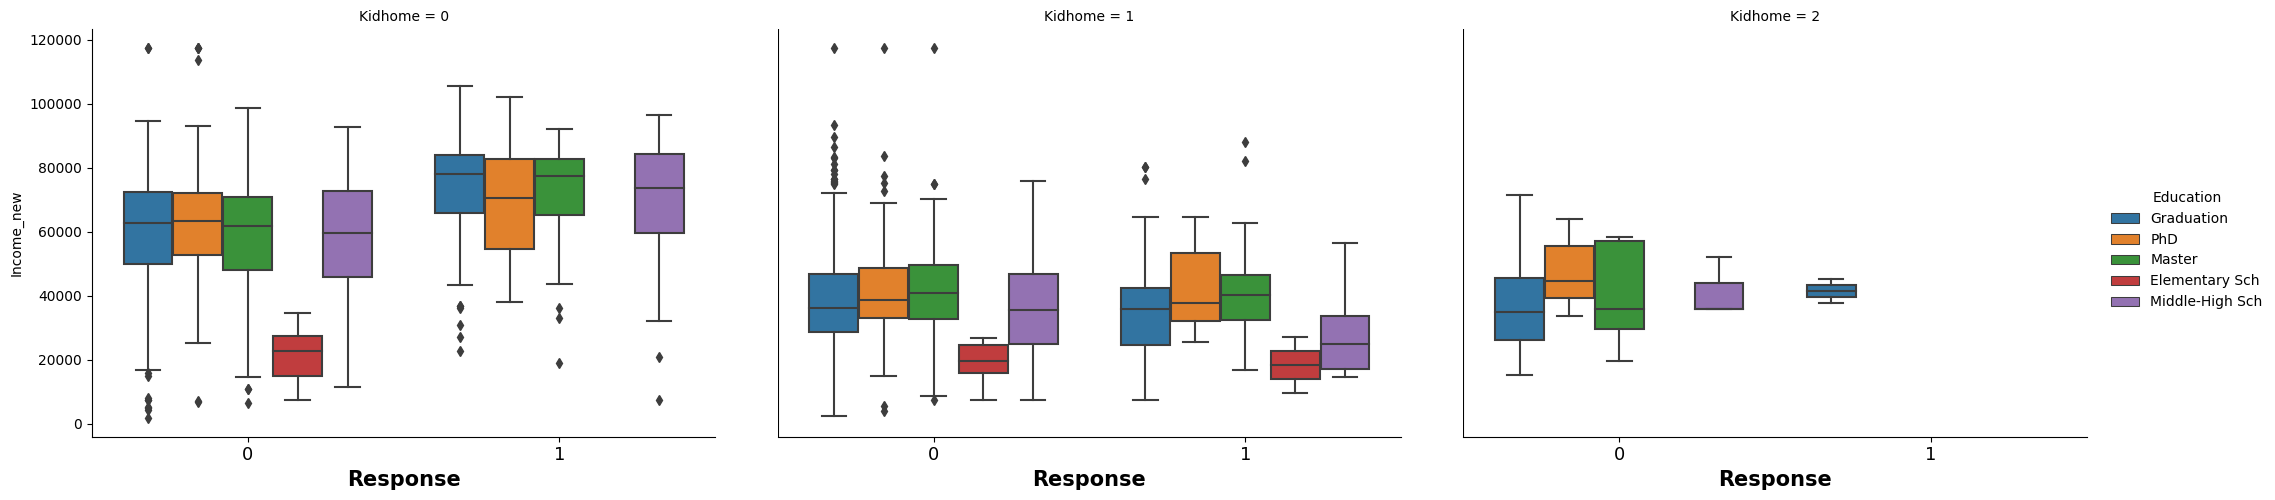

In [520]:
plt.style.use('default')
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Kidhome', hue='Education', height=5, aspect=11.7/8.27)
g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(fontdict= {'fontsize': 13} )
g.set_xlabels(fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

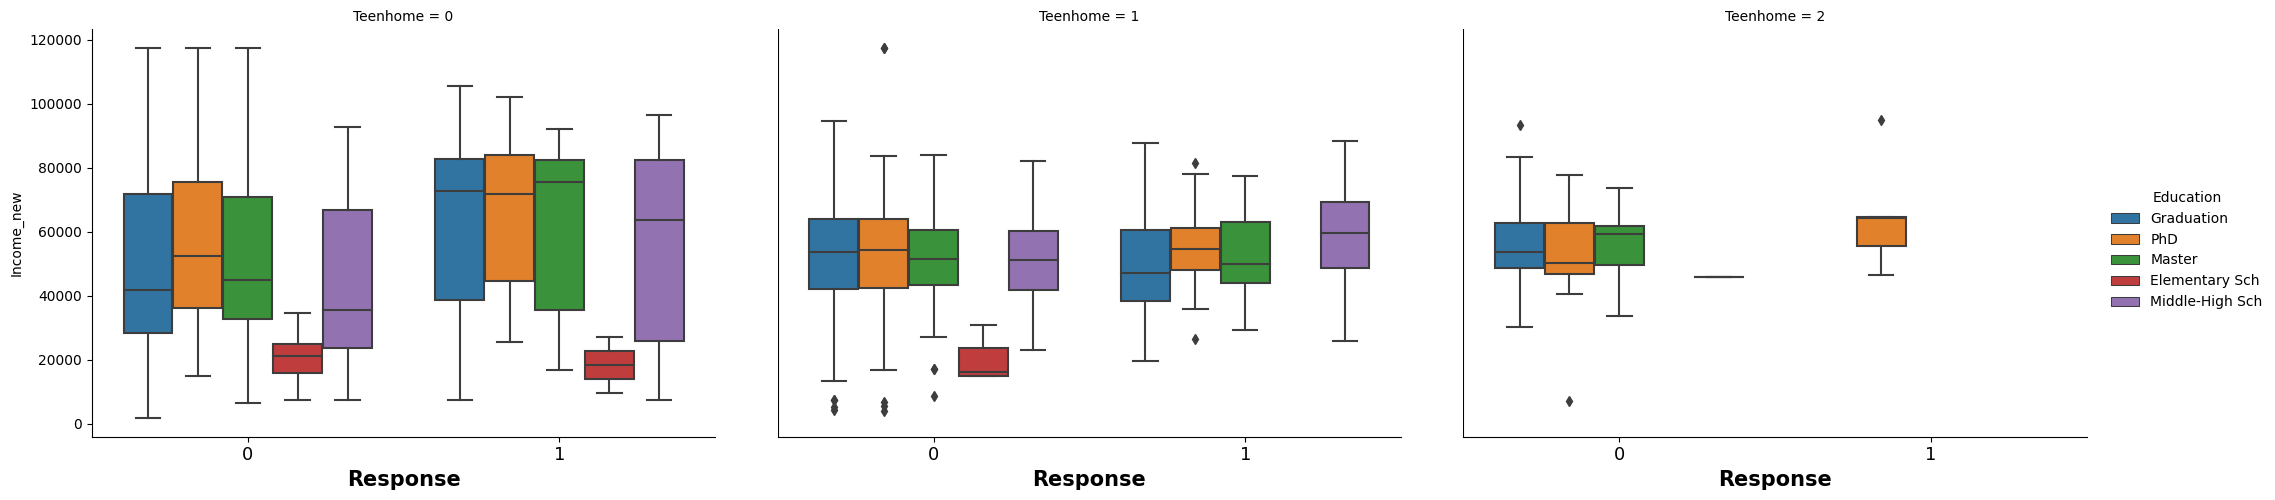

In [521]:
plt.style.use('default')
g = sns.catplot(kind='box', data=df, x='Response', y='Income_new', col='Teenhome', hue='Education', height=5, aspect=11.7/8.27)
g.fig.subplots_adjust(wspace=0.1)
g.set_xticklabels(fontdict= {'fontsize': 13} )
g.set_xlabels(fontsize = 15, fontweight ='bold')

for ax in g.axes.flatten()[1:]:
    ax.spines['left'].set_visible(False)
    [tick.set_visible(False) for tick in ax.yaxis.get_major_ticks()]
    xmin,xmax = ax.get_xlim()
    ax.axvline(xmin, ls='-', color='k')

# DATA PREPROCESSING - STAGE 2

## Data Cleaning

*   Handle missing values = dilakukan imputasi missing value pada variabel income dengan median
*   Handle duplicated data = tidak terdapat data yang duplikat
*   Handle outliers = dilakukan penanganan outlier pada income menggunakan iqr
*   Feature transformation = dilakukan standarisasi income karena memiliki sebaran nilai yang sangat besar dibandingkan variabel lainnya
*   Feature encoding pada education dan marital_status
*   Handle class imbalance

## Feature Engineering

* 2A. Feature selection (membuang feature yang kurang relevan atau redundan)
* 2B. Feature extraction (membuat feature baru dari feature yang sudah ada)
* 2C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)

Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

In [522]:
# missing value 
# sudah dilakukan pada stage 1 yaitu menangani missing value pada income dengan median

In [523]:
# duplicated data
# tidak ada data yang duplikat
df.duplicated(subset=['ID']).sum()

0

In [524]:
# feature extraction - POIN 2B
# dilakukan penggabungan variabel AcceptedCmp1 sampai AcceptedCmp5 menjadi AcceptedCmptot pada stage 1
# membuat fitur baru yaitu jumlah anggota keluarga
df['ParentSize'] = np.where((df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Widow'), 1,2)
df['HouseholdSize'] = df['Kidhome'] + df['Teenhome'] + df['ParentSize']

In [525]:
# feature extraction
# membuat fitur age menjadi data kategorikal karena terlihat dari hasil eda bahwa tidak ada perbedaan age pada response no dan yes

def age_category(Age):
    if Age >= 18 and Age <= 20:
        kategori = "Teenager"
    elif Age >= 21 and Age <= 60:
        kategori = "Adult"
    else:
        kategori = "Elderly"
    return kategori

df['Age_Category'] = df.apply(lambda x: age_category(x['Age']), axis=1)
pd.set_option('display.max_columns', None)

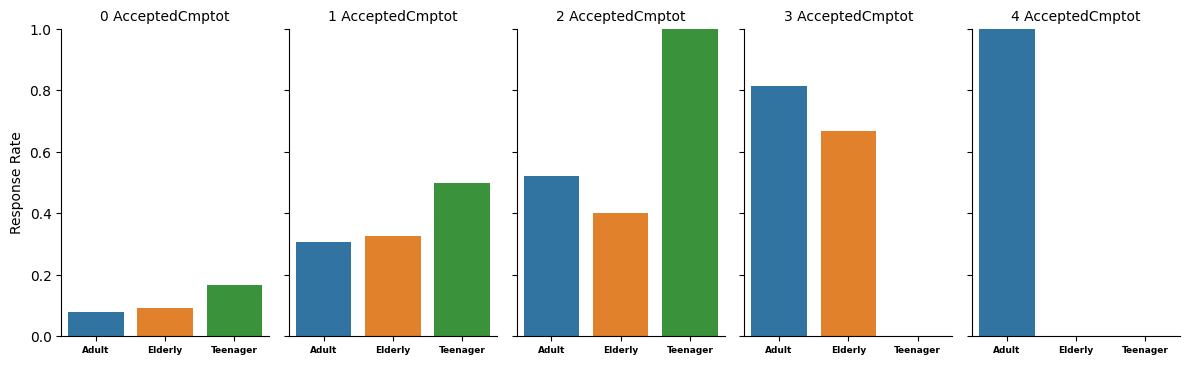

In [526]:
plt.style.use('default')
g = sns.catplot(data=df, x="Age_Category", y="Response", col="AcceptedCmptot",kind="bar", height=4, aspect=.6, ci=None)
g.set_axis_labels("","Response Rate")
g.set_xticklabels(fontdict= {'fontsize': 6.5,'fontweight': 'bold'} )
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
plt.show()

In [527]:
# feature encoding pada education dan marital status
# label encoder pada Education
df['Education'] = df['Education'].astype('category').cat.codes
df['Age_Category'] = df['Age_Category'].astype('category').cat.codes

# one hot encoding pada marital status karena tidak memiliki urutan
status_onehot = pd.get_dummies(df['Marital_Status'], prefix='Status')
df = df.join(status_onehot)

In [528]:
# feature selection
# remove variabel yang tidak digunakan
df_new = df.drop(columns=['ID','Year_Birth', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 
                          'Z_Revenue', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                          'AcceptedCmp4', 'AcceptedCmp5', 'ParentSize', 'Age', 'Income_new']).copy()
df_new.describe()

Education         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean      1.973214   52237.975446     0.444196     0.506250    49.109375   
std       1.248204   25037.955891     0.538398     0.544538    28.962453   
min       0.000000    1730.000000     0.000000     0.000000     0.000000   
25%       1.000000   35538.750000     0.000000     0.000000    24.000000   
50%       1.000000   51381.500000     0.000000     0.000000    49.000000   
75%       3.000000   68289.750000     1.000000     1.000000    74.000000   
max       4.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2240.000000   2240.000000        2240.000000      2240.000000   
mean          27.062946     44.021875           2.325000         4.084821   
std           41.280498     52.167439           1.932238         2.778714   
min            0.000000      0.000000           0.000000         0.000000   
25%            1.000000      9.000000           1.000000         2.000000   
50%            8.000000     24.000000           2.000000         4.000000   
75%           33.000000     56.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Complain  \
count          2240.000000        2240.000000        2240.000000  2240.000000   
mean              2.662054           5.790179           5.316518     0.009375   
std               2.923101           3.250958           2.426645     0.096391   
min               0.000000           0.000000           0.000000     0.000000   
25%               0.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               4.000000           8.000000           7.000000     0.000000   
max              28.000000          13.000000          20.000000     1.000000   

          Response  AcceptedCmptot  Customer_Months  HouseholdSize  \
count  2240.000000     2240.000000      2240.000000    2240.000000   
mean      0.149107        0.297768        17.194643       2.595089   
std       0.356274        0.678381         6.622911       0.906959   
min       0.000000        0.000000         6.000000       1.000000   
25%       0.000000        0.000000        11.750000       2.000000   
50%       0.000000        0.000000        17.000000       3.000000   
75%       0.000000        0.000000        23.000000       3.000000   
max       1.000000        4.000000        29.000000       5.000000   

       Age_Category  Status_Divorced  Status_Married  Status_Single  \
count   2240.000000      2240.000000     2240.000000    2240.000000   
mean       0.129018         0.103571        0.385714       0.217411   
std        0.348360         0.304772        0.486872       0.412576   
min        0.000000         0.000000        0.000000       0.000000   
25%        0.000000         0.000000        0.000000       0.000000   
50%        0.000000         0.000000        0.000000       0.000000   
75%        0.000000         0.000000        1.000000       0.000000   
max        2.000000         1.000000        1.000000       1.000000   

       

In [529]:
X = df_new.drop(columns=['Response'], axis=1)
y = df_new[['Response']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [530]:
print(X_train.shape)
print(y_train.shape)

(1568, 26)
(1568, 1)


In [531]:
print(X_test.shape)
print(y_test.shape)

(672, 26)
(672, 1)


In [532]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [533]:
low, high = outlier(X_train['Income'])

#replacing outlier with upper bound and lower bound value
X_train['Income'] = np.where(X_train['Income']>high, high, X_train['Income'])
X_train['Income'] = np.where(X_train['Income']<low, low, X_train['Income'])
X_test['Income'] = np.where(X_test['Income']>high, high, X_test['Income'])
X_test['Income'] = np.where(X_test['Income']<low, low, X_test['Income'])

In [534]:
demographic2 = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Customer_Months', 'AcceptedCmptot', 'HouseholdSize' ]
spent2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
purchase2 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

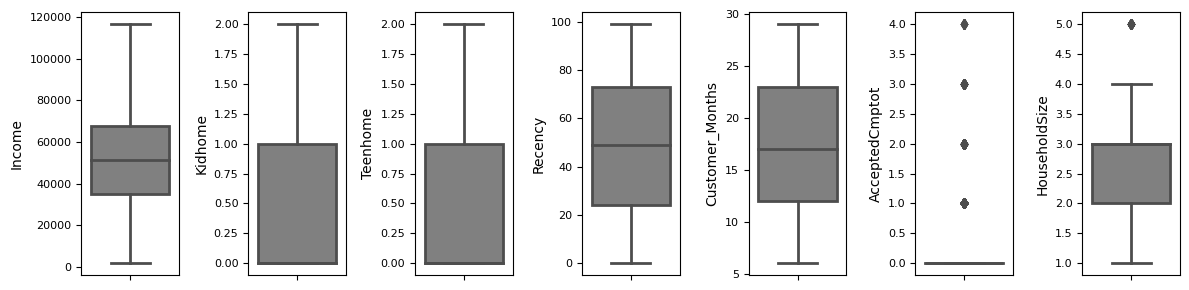

In [535]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic2)):
    plt.subplot(1, len(demographic2), i+1)
    sns.boxplot(y=X_train[demographic2[i]], color='grey', orient='v')
    plt.tight_layout()

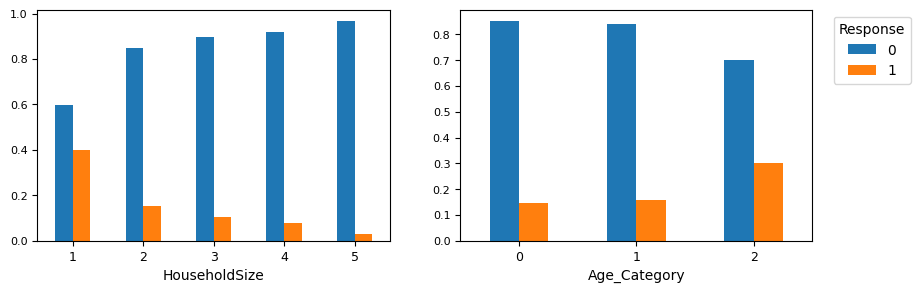

In [536]:
byhhsize = df.groupby('HouseholdSize').Response.value_counts(normalize=True)
byagecat = df.groupby('Age_Category').Response.value_counts(normalize=True)
fig, axes = plt.subplots(1, 2, figsize=(10,3))
g1 = byhhsize.unstack().plot(ax = axes[0] ,kind ='bar', legend=None)
g2 = byagecat.unstack().plot(ax = axes[1] ,kind ='bar')
for ax in [g1,g2]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=0, fontsize=9)

plt.legend(labels = ["0", "1"], fontsize = 10, title = "Response", bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

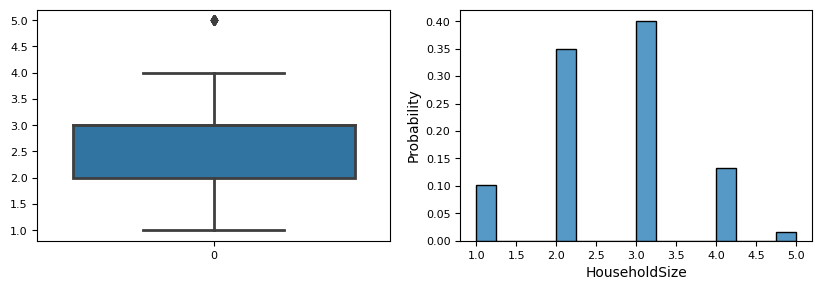

In [537]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

sns.boxplot(ax=axes[0], data = X_train['HouseholdSize'])
sns.histplot(ax=axes[1], data = X_train, x = "HouseholdSize", stat = "probability", bins=int(80/5))
plt.show()

In [538]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

scaler = ss.fit(X_train[['Income']])
X_train['Income'] = scaler.transform(X_train[['Income']])
X_test['Income'] = scaler.transform(X_test[['Income']])
# scaler.to_pickle(filename)

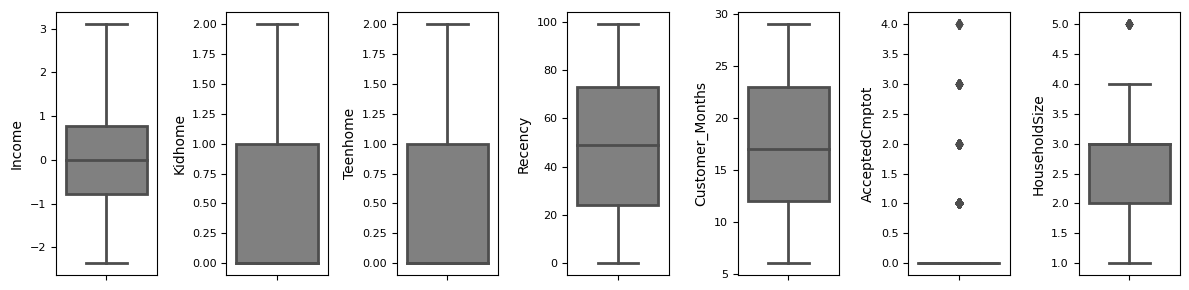

In [539]:
# visualisasi setelah scaling data
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 3
rcParams['lines.linewidth'] = 2
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

for i in range(0, len(demographic2)):
    plt.subplot(1, len(demographic2), i+1)
    sns.boxplot(y=X_train[demographic2[i]], color='grey', orient='v')
    plt.tight_layout()

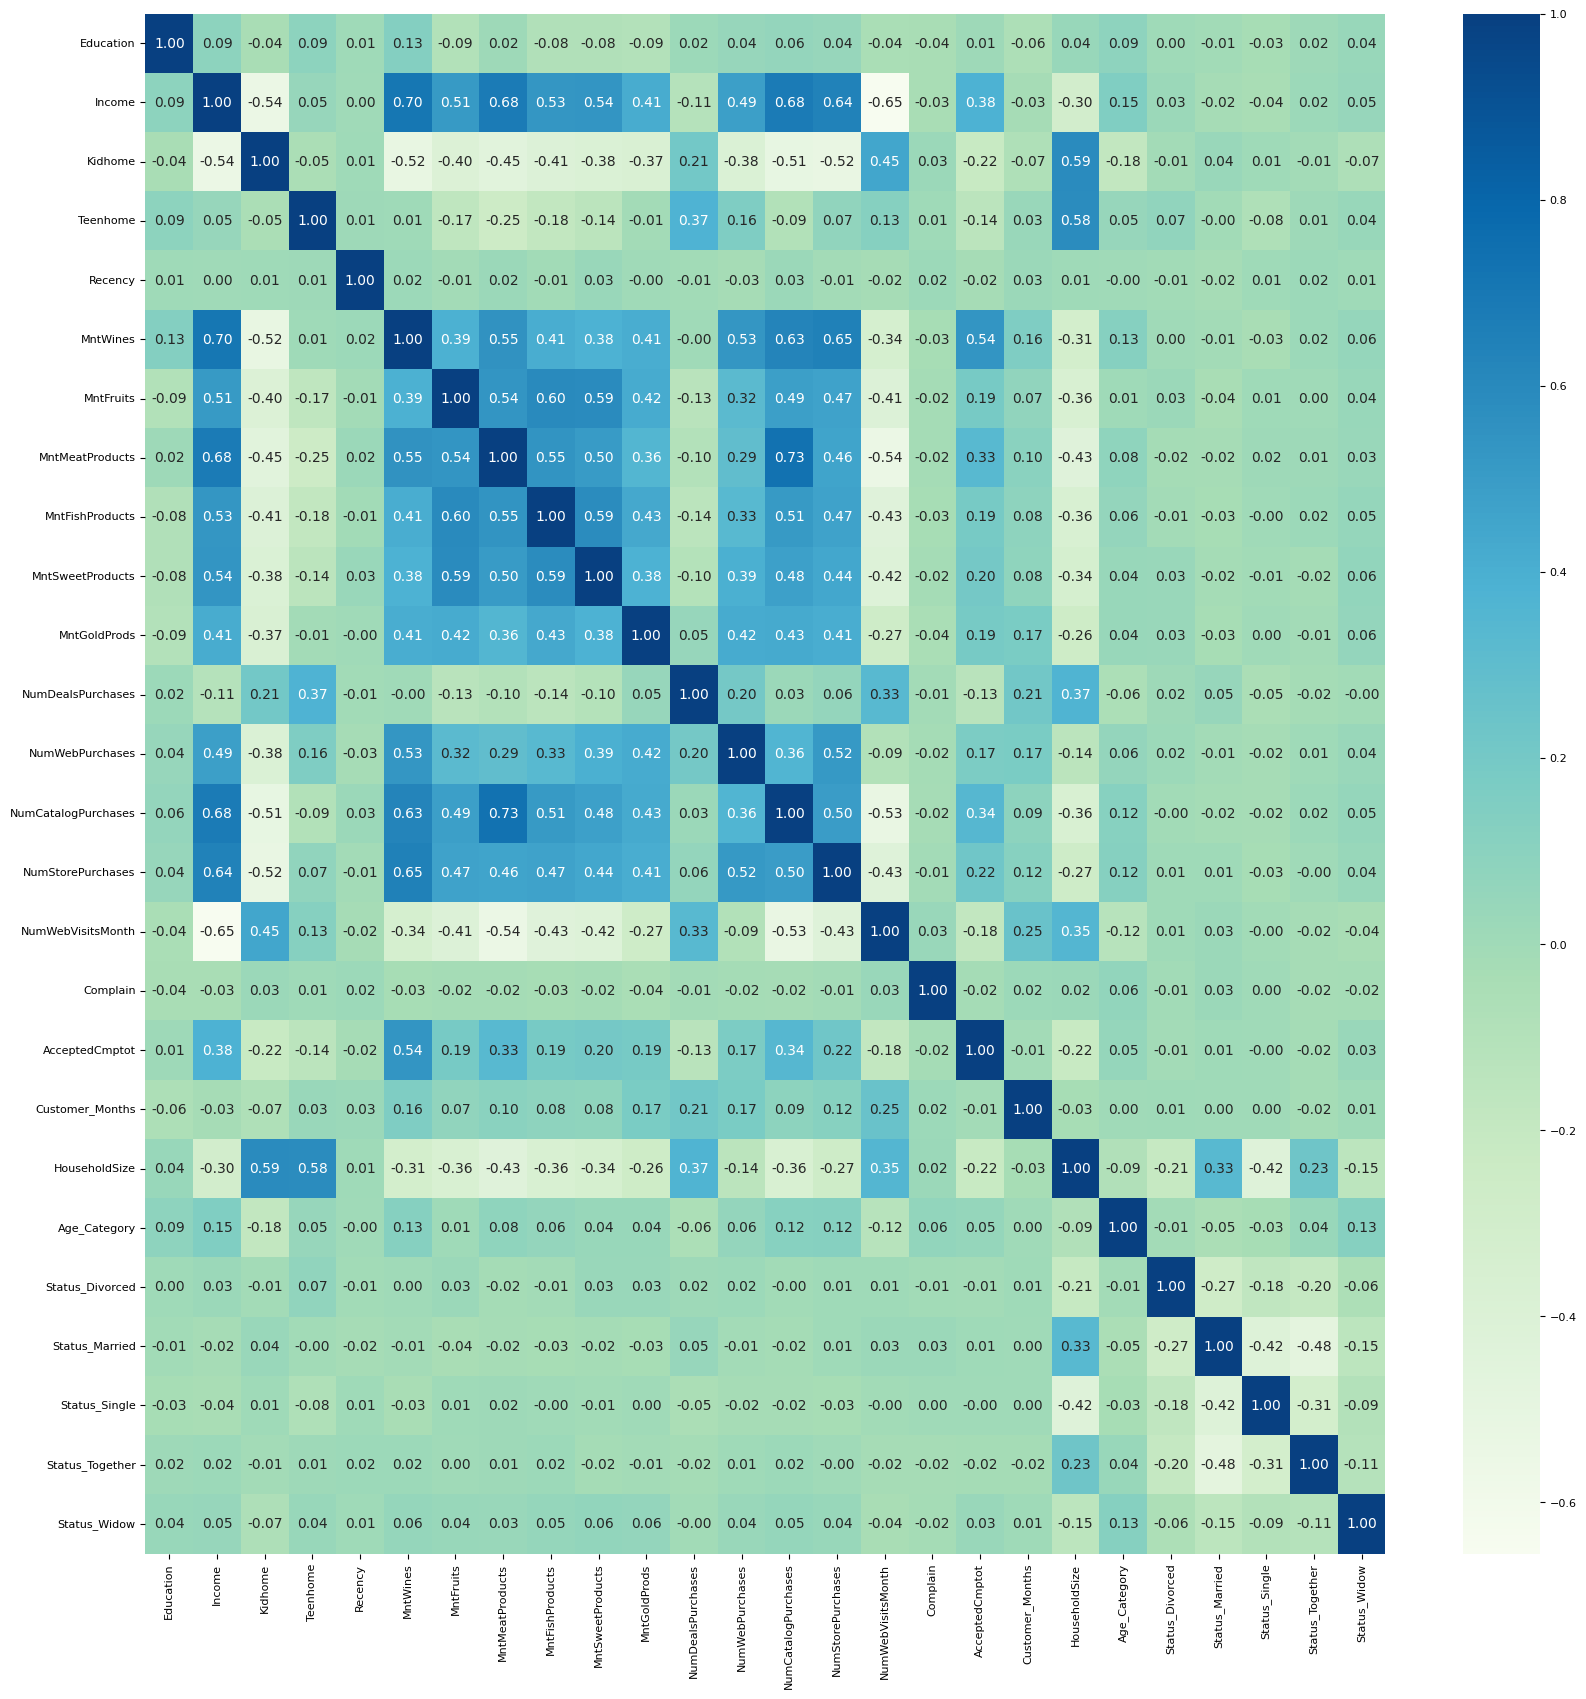

In [540]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_train.corr(), cmap='GnBu', annot=True, fmt='.2f')
plt.show()

In [541]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 994 to 860
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            1568 non-null   int8   
 1   Income               1568 non-null   float64
 2   Kidhome              1568 non-null   int64  
 3   Teenhome             1568 non-null   int64  
 4   Recency              1568 non-null   int64  
 5   MntWines             1568 non-null   int64  
 6   MntFruits            1568 non-null   int64  
 7   MntMeatProducts      1568 non-null   int64  
 8   MntFishProducts      1568 non-null   int64  
 9   MntSweetProducts     1568 non-null   int64  
 10  MntGoldProds         1568 non-null   int64  
 11  NumDealsPurchases    1568 non-null   int64  
 12  NumWebPurchases      1568 non-null   int64  
 13  NumCatalogPurchases  1568 non-null   int64  
 14  NumStorePurchases    1568 non-null   int64  
 15  NumWebVisitsMonth    1568 non-null   

In [542]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 324 to 1175
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            672 non-null    int8   
 1   Income               672 non-null    float64
 2   Kidhome              672 non-null    int64  
 3   Teenhome             672 non-null    int64  
 4   Recency              672 non-null    int64  
 5   MntWines             672 non-null    int64  
 6   MntFruits            672 non-null    int64  
 7   MntMeatProducts      672 non-null    int64  
 8   MntFishProducts      672 non-null    int64  
 9   MntSweetProducts     672 non-null    int64  
 10  MntGoldProds         672 non-null    int64  
 11  NumDealsPurchases    672 non-null    int64  
 12  NumWebPurchases      672 non-null    int64  
 13  NumCatalogPurchases  672 non-null    int64  
 14  NumStorePurchases    672 non-null    int64  
 15  NumWebVisitsMonth    672 non-null    

In [543]:
# resampling dengan smote
from imblearn import over_sampling
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)

In [544]:
# hasil resampling dengan smote
print(y_train_smote.value_counts())

Response
0           1329
1           1329
dtype: int64


In [545]:
X_train_smote.describe()

Education       Income      Kidhome     Teenhome      Recency  \
count  2658.000000  2658.000000  2658.000000  2658.000000  2658.000000   
mean      1.921746     0.156819     0.378480     0.361550    41.825056   
std       1.185428     1.037686     0.510798     0.507953    27.568819   
min       0.000000    -2.365179     0.000000     0.000000     0.000000   
25%       1.000000    -0.700321     0.000000     0.000000    18.000000   
50%       1.000000     0.177788     0.000000     0.000000    39.000000   
75%       3.000000     1.043862     1.000000     1.000000    63.750000   
max       4.000000     3.097430     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2658.000000  2658.000000      2658.000000      2658.000000   
mean    385.437547    30.251693       223.949962        41.629797   
std     391.838893    41.140353       266.244807        54.095010   
min       0.000000     0.000000         0.000000         0.000000   
25%      31.250000     2.000000        21.000000         3.000000   
50%     244.500000    12.000000        98.500000        16.000000   
75%     635.000000    42.000000       372.750000        62.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count       2658.000000   2658.000000        2658.000000      2658.000000   
mean          31.134312     50.849135           2.186983         4.302483   
std           41.263444     51.417098           1.877914         2.648581   
min            0.000000      0.000000           0.000000         0.000000   
25%            2.000000     14.250000           1.000000         2.000000   
50%           12.500000     34.000000           1.000000         4.000000   
75%           46.000000     71.000000           3.000000         6.000000   
max          263.000000    362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth     Complain  \
count          2658.000000        2658.000000        2658.000000  2658.000000   
mean              3.112491           5.741535           5.127916     0.004891   
std               2.989466           3.078415           2.442759     0.069777   
min               0.000000           0.000000           0.000000     0.000000   
25%               1.000000           3.000000           3.000000     0.000000   
50%               2.000000           5.000000           6.000000     0.000000   
75%               5.000000           8.000000           7.000000     0.000000   
max              28.000000          13.000000          20.000000     1.000000   

       AcceptedCmptot  Customer_Months  HouseholdSize  Age_Category  \
count     2658.000000      2658.000000    2658.000000   2658.000000   
mean         0.474793        18.141460       2.283296      0.090293   
std          0.789661         6.311772       0.947170      0.298238   
min          0.000000         6.000000       1.000000      0.000000   
25%          0.000000        13.000000       2.000000      0.000000   
50%          0.000000        19.000000       2.000000      0.000000   
75%          1.000000        24.000000       3.000000      0.000000   
max          4.000000        29.000000       5.000000      2.000000   

       Status_Divorced  Status_Married  Status_Single  Status_Together  \
count      2658.000000     2658.000000    2658.000000      2658.000000   
mean          0.065087        0.276900       0.163657         0.163657   
std           0.246725        0.447551       0.370034         0.370034   
min           0.000000        0.000000       0.000000         0.000000   
25%           0.000000        0.000000       0.000000         0.000000   
50%           0.000000        0.000000       0.000000         0.000000   
75%           0.000000        1.000000       0.000000         0.000000   
max           1.000000        1.000000       1.000000         1.

**Mencari variabel yang datanya imbalance**

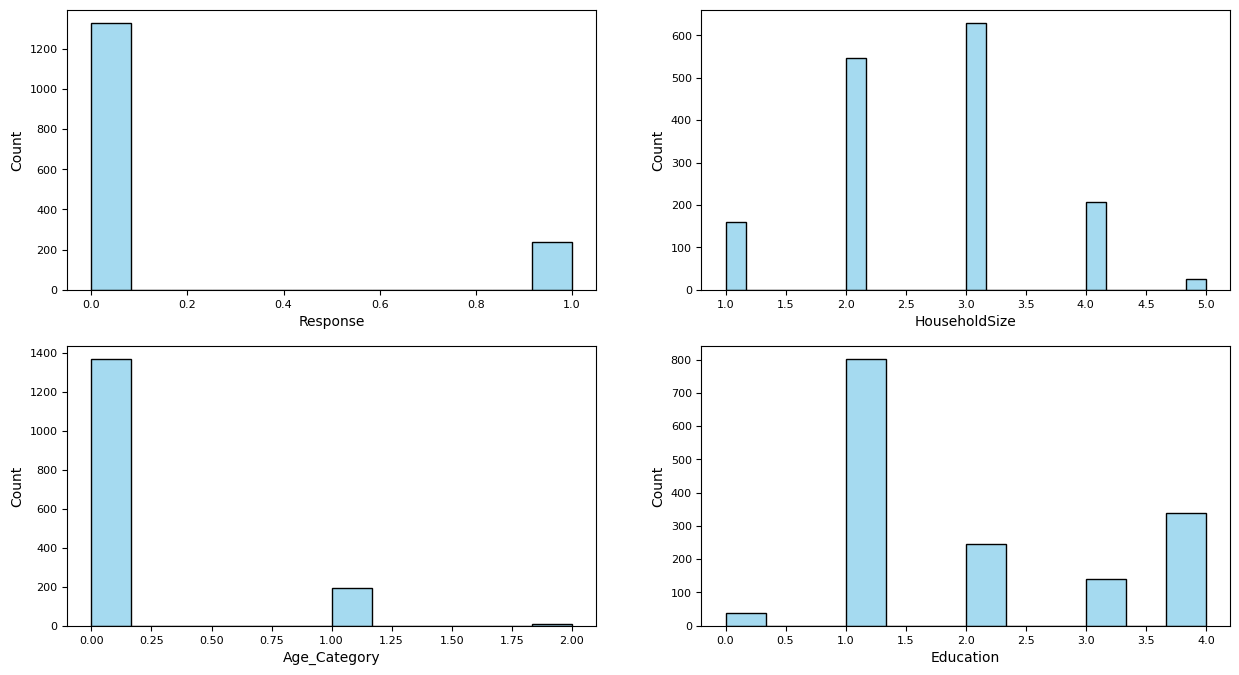

In [546]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=y_train,x='Response',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='HouseholdSize',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Age_Category',ax=axes[1,0],color='skyblue')
sns.histplot(data=X_train,x='Education',ax=axes[1,1],color='skyblue')

plt.show()

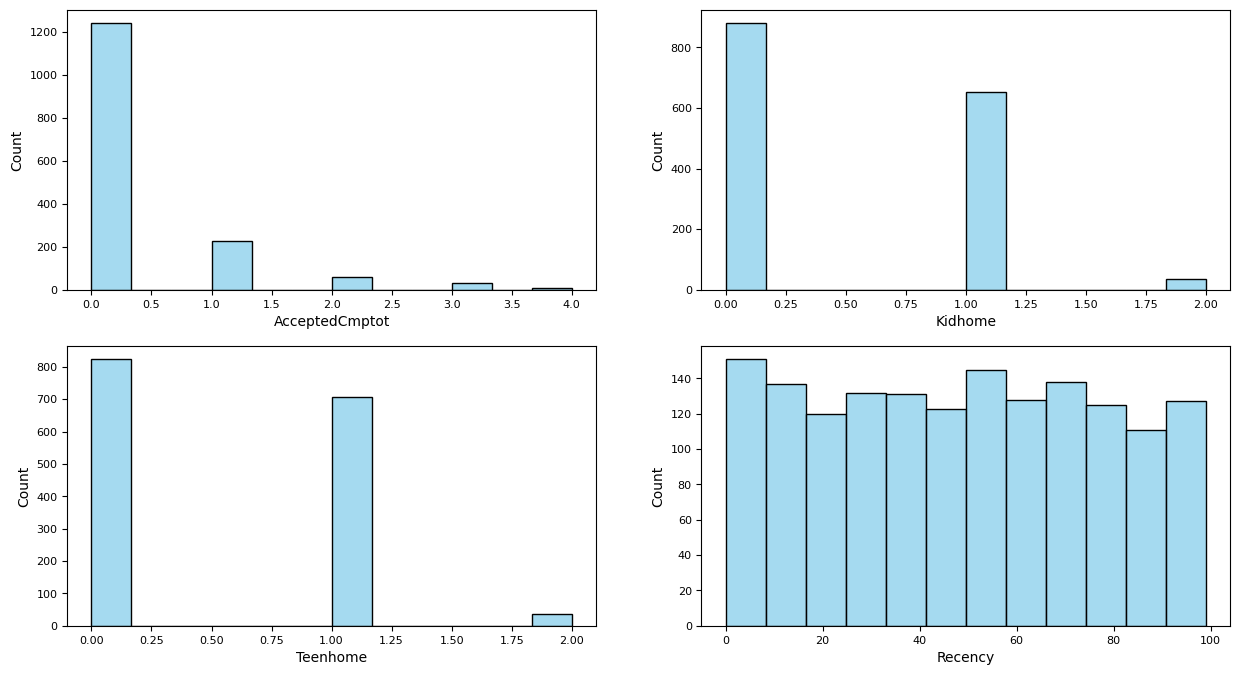

In [547]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=X_train,x='AcceptedCmptot',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='Kidhome',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Teenhome',ax=axes[1,0],color='skyblue')
sns.histplot(data=X_train,x='Recency',ax=axes[1,1],color='skyblue')

plt.show()

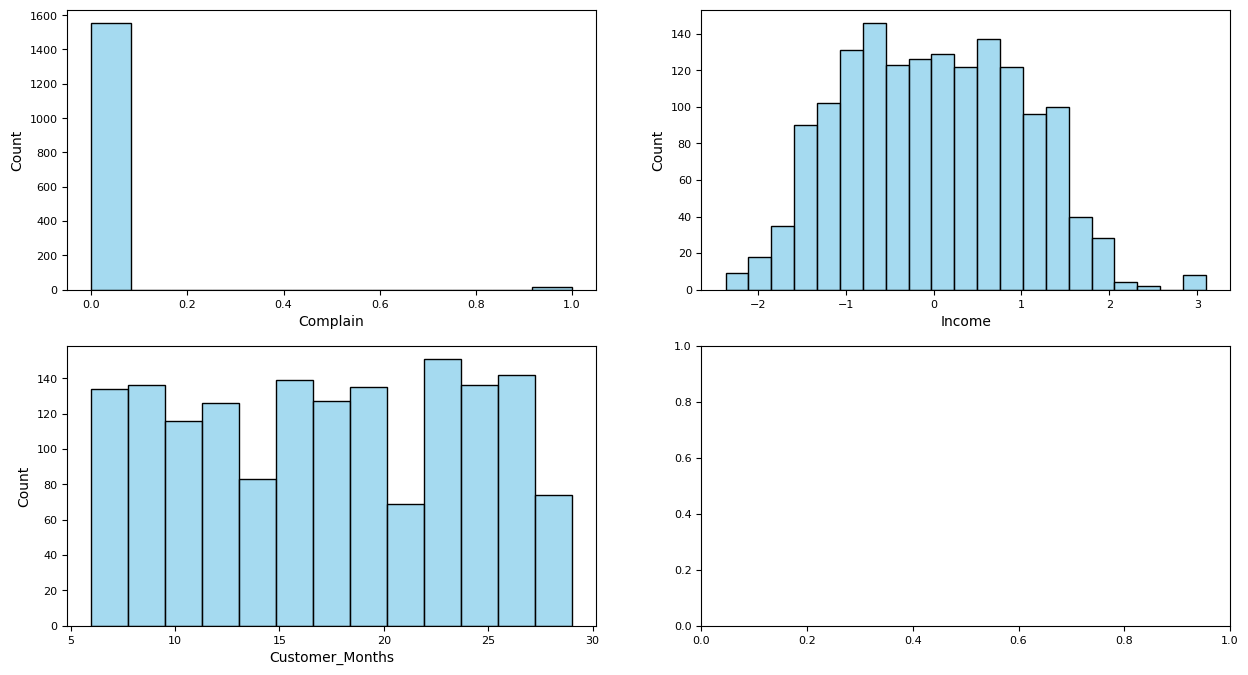

In [548]:
#mencari data imbalance
fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=X_train,x='Complain',ax=axes[0,0],color='skyblue')
sns.histplot(data=X_train,x='Income',ax=axes[0,1],color='skyblue')
sns.histplot(data=X_train,x='Customer_Months',ax=axes[1,0],color='skyblue')
#sns.histplot(data=df,x='Income',ax=axes[1,1],color='skyblue')

plt.show()

In [549]:
# pembuatan binary label target
df['response_class'] = df['Response'] > 0.8
df['response_class'].value_counts()

False    1906
True      334
Name: response_class, dtype: int64

In [550]:
# Menghitung jumlah kemunculan setiap nilai dalam variabel
value_counts = df['Response'].value_counts()

# Mengambil jumlah "yes" dan "no"
yes_count = value_counts.get('0', 1906)
no_count = value_counts.get('1', 334)

# Menghitung persentase "yes" dan "no"
total_count = len(df)
yes_percentage = (yes_count / total_count) * 100
no_percentage = (no_count / total_count) * 100

# Menampilkan hasil
print("Persentase Yes:", yes_percentage)
print("Persentase No:", no_percentage)

Persentase Yes: 85.08928571428571
Persentase No: 14.910714285714285


In [551]:
# pemisahan features vs target
#X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response', 'response_class']]]
#y = df['response_class'].values
#print(X.shape)
#print(y.shape)

**Memproses variabel yang datanya imbalance**

In [552]:
# split ini udah aku pindah ke atas
from imblearn.over_sampling import RandomOverSampler

# Mengambil variabel 'Complain', 'Response', dan variabel lainnya dari DataFrame df
# X = df.drop(['Response'], axis=1)
# y_response = df['Response']

In [553]:
print(X_train.shape)
print(y_train.shape)

(1568, 26)
(1568, 1)


In [554]:
# edit by dinda
# Menerapkan oversampling pada variabel 'Response' menggunakan RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Mengambil variabel 'Complain', 'Response', dan variabel lainnya dari DataFrame df

ros_response = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros_response.fit_resample(X_train, y_train)

# Menggabungkan kembali data yang telah diresampling menjadi DataFrame baru
df_over = pd.concat([X_train_over, y_train_over], axis=1)

print('jumlah response:')
print(df_over['Response'].value_counts())

jumlah response:
0    1329
1    1329
Name: Response, dtype: int64


In [555]:
print(df_over.shape)

(2658, 27)


In [556]:
df_over.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'AcceptedCmptot', 'Customer_Months', 'HouseholdSize',
       'Age_Category', 'Status_Divorced', 'Status_Married', 'Status_Single',
       'Status_Together', 'Status_Widow', 'Response'],
      dtype='object')

In [557]:
#df_over = df_over[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
#                   'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
#                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
#                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
#                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
#                   'AcceptedCmptot', 'Age', 'Customer_Months', 'Income_new',
#                   'Status_Divorced', 'Status_Married', 'Status_Single', 'Status_Together',
#                   'Status_Widow', 'response_class', 'Response']]

In [558]:
df_over.isna().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
AcceptedCmptot         0
Customer_Months        0
HouseholdSize          0
Age_Category           0
Status_Divorced        0
Status_Married         0
Status_Single          0
Status_Together        0
Status_Widow           0
Response               0
dtype: int64

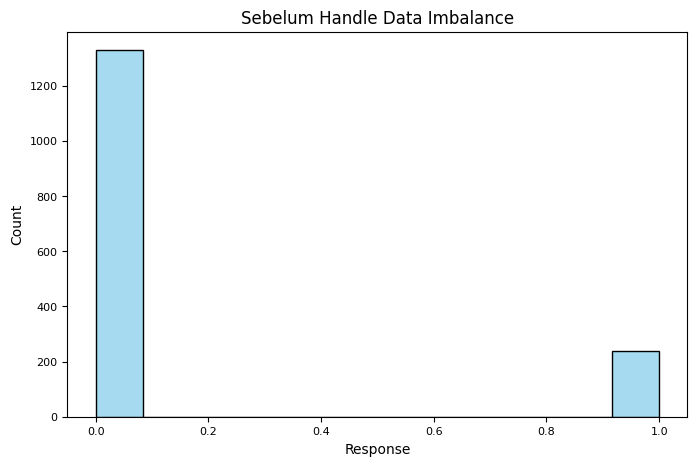

In [559]:
#sebelum dilakukan handle class imbalance
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=y_train, x='Response', color='skyblue')
plt.title('Sebelum Handle Data Imbalance', fontsize = 12) # Menambahkan jarak antar subplot
plt.show()

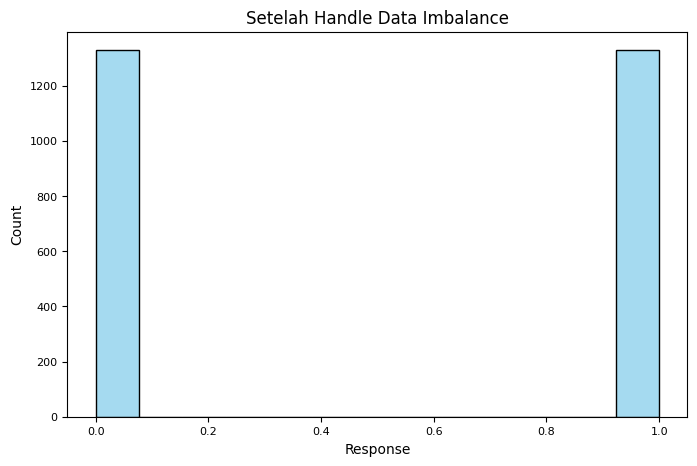

In [560]:
#sebelum dilakukan handle class imbalance
fig, axes = plt.subplots(figsize=(8, 5))
sns.histplot(data=df_over, x='Response', color='skyblue')
plt.title('Setelah Handle Data Imbalance', fontsize = 12) # Menambahkan jarak antar subplot
plt.show()

**FEATURE EXTRACTION - POIN 2B**
- membuat fitur baru yaitu customer_month yang diperoleh dari DtCustomer
- menambahkan fitur baru yaitu household size
- membuat fitur age menjadi data kategorikal

**FITUR TAMBAHAN - POIN 2C**
- WebEngagement:  Menghitung tingkat interaksi pelanggan dengan situs web perusahaan Fitur ini mencerminkan seberapa sering pelanggan mengunjungi situs web dan seberapa baru kunjungan terakhir mereka.
- Jumlah cicilan
- Tempat tinggal customer: untuk mengetahui apakah customer cocok dengan campaign yang akan dibuat, apakah campaign dalam bentuk web purchase atau store purchase
- Delivery time from web purchase: lama pengiriman dapat mempengaruhi customer untuk merespon campaign